<a href="https://colab.research.google.com/github/snigdhatanu/Migration-Crisis-Analysis-/blob/main/Missing_Migrants_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Cleaning



In [208]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [209]:
data=("https://raw.githubusercontent.com/snigdhatanu/Migration-Crisis-Analysis-/refs/heads/main/Global%20Missing%20Migrants%20Dataset.csv")

In [210]:
df=pd.read_csv("/content/Global Missing Migrants Dataset.csv")

In [211]:
df.head()

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   
3      Incident           2014        January                Central America   
4      Incident           2014        January                Northern Africa   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala             1.0   
1      North America           Unknown             1.0   
2      North America           Unknown             1.0   
3      North America            Mexico             1.0   
4             Europe             Sudan             1.0   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Number of Survivors  Number of Females  Number of Males  \
0                    0                  0                1   
1                    0                  0                0   
2                    0                  0                0   
3                    0                  0                1   
4                    2                  0                1   

   Number of Children                                     Cause of Death  \
0                   0                                   Mixed or unknown   
1                   0                                   Mixed or unknown   
2                   0                                   Mixed or unknown   
3                   0                                           Violence   
4                   0  Harsh environmental conditions / lack of adequ...   

             Migration route  \
0  US-Mexico border crossing   
1  US-Mexico border crossing   
2  US-Mexico border crossing   
3  US-Mexico border crossing   
4                        NaN   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
4                  Border between Russia and Estonia   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   
3  Ministry of Foreign Affairs Mexico, Pima Count...  31.506777, -109.315632   
4                  EUBusiness (Agence France-Presse)             59.1551, 28   

  UNSD Geographical Grouping  
0           Northern America  
1           Northern America  
2           Northern America  
3           Northern America  
4            Northern Europe

In [212]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

In [213]:
df.dtypes

Incident Type                           object
Incident year                            int64
Reported Month                          object
Region of Origin                        object
Region of Incident                      object
Country of Origin                       object
Number of Dead                         float64
Minimum Estimated Number of Missing      int64
Total Number of Dead and Missing         int64
Number of Survivors                      int64
Number of Females                        int64
Number of Males                          int64
Number of Children                       int64
Cause of Death                          object
Migration route                         object
Location of death                       object
Information Source                      object
Coordinates                             object
UNSD Geographical Grouping              object
dtype: object

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Incident Type                        13020 non-null  object 
 1   Incident year                        13020 non-null  int64  
 2   Reported Month                       13020 non-null  object 
 3   Region of Origin                     12998 non-null  object 
 4   Region of Incident                   13020 non-null  object 
 5   Country of Origin                    13012 non-null  object 
 6   Number of Dead                       12470 non-null  float64
 7   Minimum Estimated Number of Missing  13020 non-null  int64  
 8   Total Number of Dead and Missing     13020 non-null  int64  
 9   Number of Survivors                  13020 non-null  int64  
 10  Number of Females                    13020 non-null  int64  
 11  Number of Males             

In [215]:
df.isnull().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                         22
Region of Incident                        0
Country of Origin                         8
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64

In [216]:
df_nullcheck=df.isnull().any(axis=1)
df_null=df[df_nullcheck]
df_null.sample(10)

Incident Type  Incident year Reported Month  \
11386      Incident           2022         August   
2461       Incident           2017        January   
11385      Incident           2022         August   
7523       Incident           2020           June   
5825       Incident           2019          April   
12226      Incident           2022      September   
6530       Incident           2019         August   
3408       Incident           2017        October   
10704      Incident           2022          April   
5496       Incident           2019        January   

                    Region of Origin Region of Incident     Country of Origin  \
11386                 Eastern Africa     Eastern Africa              Ethiopia   
2461              Eastern Africa (P)     Eastern Africa               Unknown   
11385                 Eastern Africa     Eastern Africa              Ethiopia   
7523   Latin America / Caribbean (P)    Central America               Unknown   
5825          Sub-Saharan Africa (P)     Western Africa               Unknown   
12226            Northern Africa (P)      Mediterranean               Unknown   
6530              Eastern Africa (P)     Eastern Africa               Unknown   
3408     Western / Southern Asia (P)      Southern Asia               Unknown   
10704                   Western Asia             Europe  Syrian Arab Republic   
5496          Sub-Saharan Africa (P)     Western Africa               Unknown   

       Number of Dead  Minimum Estimated Number of Missing  \
11386             1.0                                    0   
2461              1.0                                    0   
11385             1.0                                    0   
7523              1.0                                    0   
5825              2.0                                    0   
12226             NaN                                    8   
6530              6.0                                    0   
3408              1.0                                    0   
10704             NaN                                    2   
5496              1.0                                    0   

       Total Number of Dead and Missing  Number of Survivors  \
11386                                 1                    0   
2461                                  1                    0   
11385                                 1                    0   
7523                                  1                    0   
5825                                  2                    0   
12226                                 8                    4   
6530                                  6                   26   
3408                                  1                    0   
10704                                 2                    0   
5496                                  1                    1   

       Number of Females  Number of Males  Number of Children  \
11386                  0                1                   0   
2461                   0                0                   0   
11385                  0                1                   0   
7523                   0                1                   0   
5825                   0                2                   2   
12226                  0                0                   0   
6530                   0                6                   0   
3408                   0                1                   0   
10704                  0                1                   1   
5496                   0                0                   0   

                                          Cause of Death  \
11386  Harsh environmental conditions / lack of adequ...   
2461                                    Mixed or unknown   
11385  Harsh environmental conditions / lack of adequ...   
7523   Vehicle accident / death linked to hazardous t...   
5825   Vehicle accident / death linked to hazardous t...   
12226                                           Drowning   
6530  

In [217]:
df_null.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

In [218]:
origin = df.isnull()
df_origin = df[origin]
df_origin.sample(10)

Incident Type  Incident year Reported Month Region of Origin  \
10871           NaN            NaN            NaN              NaN   
7519            NaN            NaN            NaN              NaN   
3880            NaN            NaN            NaN              NaN   
11191           NaN            NaN            NaN              NaN   
8224            NaN            NaN            NaN              NaN   
2791            NaN            NaN            NaN              NaN   
2153            NaN            NaN            NaN              NaN   
6422            NaN            NaN            NaN              NaN   
10102           NaN            NaN            NaN              NaN   
8603            NaN            NaN            NaN              NaN   

      Region of Incident Country of Origin  Number of Dead  \
10871                NaN               NaN             NaN   
7519                 NaN               NaN             NaN   
3880                 NaN               NaN             NaN   
11191                NaN               NaN             NaN   
8224                 NaN               NaN             NaN   
2791                 NaN               NaN             NaN   
2153                 NaN               NaN             NaN   
6422                 NaN               NaN             NaN   
10102                NaN               NaN             NaN   
8603                 NaN               NaN             NaN   

       Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
10871                                  NaN                               NaN   
7519                                   NaN                               NaN   
3880                                   NaN                               NaN   
11191                                  NaN                               NaN   
8224                                   NaN                               NaN   
2791                                   NaN                               NaN   
2153                                   NaN                               NaN   
6422                                   NaN                               NaN   
10102                                  NaN                               NaN   
8603                                   NaN                               NaN   

       Number of Survivors  Number of Females  Number of Males  \
10871                  NaN                NaN              NaN   
7519                   NaN                NaN              NaN   
3880                   NaN                NaN              NaN   
11191                  NaN                NaN              NaN   
8224                   NaN                NaN              NaN   
2791                   NaN                NaN              NaN   
2153                   NaN                NaN              NaN   
6422                   NaN                NaN              NaN   
10102                  NaN                NaN              NaN   
8603                   NaN                NaN              NaN   

       Number of Children Cause of Death Migration route Location of death  \
10871                 NaN            NaN             NaN               NaN   
7519                  NaN            NaN             NaN               NaN   
3880                  NaN            NaN             NaN               NaN   
11191                 NaN            NaN             NaN               NaN   
8224                  NaN            NaN             NaN               NaN   
2791                  NaN            NaN             NaN               NaN   
2153                  NaN            NaN             NaN               NaN   
6422                  NaN            NaN             NaN               NaN   
10102                 NaN            NaN             NaN               NaN   
8603                  NaN            NaN             NaN               NaN   

      Information Source Coordinates UNSD Geographical Grouping  
10871              

In [219]:
origin = df[['Region of Origin','Country of Origin']].isnull().any(axis=1)
df_origin = df[origin]
df_origin.sample(10)

Incident Type  Incident year Reported Month Region of Origin  \
12923      Incident           2023        January              NaN   
12943      Incident           2023            May              NaN   
12932      Incident           2023          March              NaN   
12929      Incident           2023       February              NaN   
12935      Incident           2023          March              NaN   
12937      Incident           2023          April              NaN   
12939      Incident           2023          April              NaN   
12927      Incident           2023       February              NaN   
12941      Incident           2023            May              NaN   
12933      Incident           2023          March              NaN   

      Region of Incident     Country of Origin  Number of Dead  \
12923    Northern Africa                 Sudan             1.0   
12943    Northern Africa               Unknown             1.0   
12932    Northern Africa  Syrian Arab Republic             1.0   
12929    Northern Africa               Unknown             3.0   
12935    Northern Africa            Mauritania             2.0   
12937    Northern Africa               Nigeria             2.0   
12939    Northern Africa                 Egypt             1.0   
12927    Northern Africa                 Sudan             1.0   
12941    Northern Africa            Bangladesh             8.0   
12933    Northern Africa               Unknown             2.0   

       Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
12923                                    0                                 1   
12943                                    0                                 1   
12932                                    0                                 1   
12929                                    0                                 3   
12935                                    0                                 2   
12937                                    0                                 2   
12939                                    0                                 1   
12927                                    0                                 1   
12941                                    0                                 8   
12933                                    6                                 8   

       Number of Survivors  Number of Females  Number of Males  \
12923                    0                  0                1   
12943                    6                  0                7   
12932                    1                  0                2   
12929                    0                  1                2   
12935                    3                  0                2   
12937                    0                  0                2   
12939                    0                  0                1   
12927                    0                  0                1   
12941                    0                  0                8   
12933                    8                  0                8   

       Number of Children                                     Cause of Death  \
12923                   0   Sickness / lack of access to adequate healthcare   
12943                   0  Vehicle accident / death linked to hazardous t...   
12932                   0  Harsh environmental conditions / lack of adequ...   
12929                   0                                   Mixed or unknown   
12935                   1  Vehicle accident / death linked to hazardous t...   
12937                   0  Vehicle accident / death linked to hazardous t...   
12939                   0                                           Violence   
12927                   0                                   Accidental death   
12941                   0  Vehicle accident / death linked to hazardous t...   
12933                   0  Vehicle accident / death linked to hazardous t...   

              Migra

In [220]:
df_origin['Region of Origin'].unique()

array(['Unknown', 'South-eastern Asia', 'Latin America / Caribbean (P)',
       'Central America', 'Eastern Africa (P)', nan], dtype=object)

In [221]:
df_origin["Country of Origin"].unique()

array([nan, 'Afghanistan,Iraq,Syrian Arab Republic', 'Sudan', 'Egypt',
       'Unknown', 'Nigeria', 'Chad', 'Syrian Arab Republic', 'Mauritania',
       'Bangladesh'], dtype=object)

In [222]:
df_origin_country=df_origin[["Region of Origin","Country of Origin"]]
df_origin_country

Region of Origin                      Country of Origin
132                          Unknown                                    NaN
185                          Unknown                                    NaN
254                          Unknown                                    NaN
423               South-eastern Asia                                    NaN
761    Latin America / Caribbean (P)                                    NaN
922                  Central America                                    NaN
974                  Central America                                    NaN
1003              Eastern Africa (P)                                    NaN
1217                             NaN  Afghanistan,Iraq,Syrian Arab Republic
12923                            NaN                                  Sudan
12924                            NaN                                  Egypt
12925                            NaN                                Unknown
12926                            NaN                                Nigeria
12927                            NaN                                  Sudan
12928                            NaN                                Unknown
12929                            NaN                                Unknown
12930                            NaN                                Unknown
12931                            NaN                                   Chad
12932                            NaN                   Syrian Arab Republic
12933                            NaN                                Unknown
12934                            NaN                                Unknown
12935                            NaN                             Mauritania
12936                            NaN                                Unknown
12937                            NaN                                Nigeria
12938                            NaN                                Unknown
12939                            NaN                                  Egypt
12940                            NaN                                Unknown
12941                            NaN                             Bangladesh
12942                            NaN                                Unknown
12943                            NaN                                Unknown

In [223]:
df["Country of Origin"]=np.where((df["Region of Origin"]=="Unknown")&(df["Country of Origin"].isna()),"unknown",df["Country of Origin"])

In [224]:
df["Country of Origin"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13020 entries, 0 to 13019
Series name: Country of Origin
Non-Null Count  Dtype 
--------------  ----- 
13015 non-null  object
dtypes: object(1)
memory usage: 101.8+ KB


In [225]:
df["Country of Origin"].isna().sum()

5

In [226]:
df_cleaning=df[["Country of Origin","Region of Origin"]].isna().any(axis=1)
df_cleaning=df[df_cleaning]
df_cleaning

Incident Type  Incident year Reported Month  \
423        Incident           2015            May   
761        Incident           2015        October   
922        Incident           2015       November   
974        Incident           2015       December   
1003       Incident           2015       December   
1217       Incident           2016        January   
12923      Incident           2023        January   
12924      Incident           2023        January   
12925      Incident           2023        January   
12926      Incident           2023       February   
12927      Incident           2023       February   
12928      Incident           2023        January   
12929      Incident           2023       February   
12930      Incident           2023       February   
12931      Incident           2023          March   
12932      Incident           2023          March   
12933      Incident           2023          March   
12934      Incident           2023          March   
12935      Incident           2023          March   
12936      Incident           2023          April   
12937      Incident           2023          April   
12938      Incident           2023          April   
12939      Incident           2023          April   
12940      Incident           2023            May   
12941      Incident           2023            May   
12942      Incident           2023            May   
12943      Incident           2023            May   

                    Region of Origin  Region of Incident  \
423               South-eastern Asia  South-eastern Asia   
761    Latin America / Caribbean (P)     Central America   
922                  Central America       North America   
974                  Central America       North America   
1003              Eastern Africa (P)     Northern Africa   
1217                             NaN       Mediterranean   
12923                            NaN     Northern Africa   
12924                            NaN     Northern Africa   
12925                            NaN     Northern Africa   
12926                            NaN     Northern Africa   
12927                            NaN     Northern Africa   
12928                            NaN     Northern Africa   
12929                            NaN     Northern Africa   
12930                            NaN     Northern Africa   
12931                            NaN     Northern Africa   
12932                            NaN     Northern Africa   
12933                            NaN     Northern Africa   
12934                            NaN     Northern Africa   
12935                            NaN     Northern Africa   
12936                            NaN     Northern Africa   
12937                            NaN     Northern Africa   
12938                            NaN     Northern Africa   
12939                            NaN     Northern Africa   
12940                            NaN     Northern Africa   
12941                            NaN     Northern Africa   
12942                            NaN     Northern Africa   
12943                            NaN     Northern Africa   

                           Country of Origin  Number of Dead  \
423                                      NaN             2.0   
761                                      NaN             1.0   
922                                      NaN             1.0   
974                                      NaN             1.0   
1003                                     NaN             2.0   
1217   Afghanistan,Iraq,Syrian Arab Republic            39.0   
12923                                  Sudan             1.0   
12924                                  Egypt             1.0   
12925                                Unknown             1.0   
12926                                Nigeria             1.0   
12927                                  Sudan             1.0   
12928                                Unknown             3.0   
12929   

In [227]:
df_cleaning=df_cleaning[["Region of Origin","Country of Origin"]]
df_cleaning

Region of Origin                      Country of Origin
423               South-eastern Asia                                    NaN
761    Latin America / Caribbean (P)                                    NaN
922                  Central America                                    NaN
974                  Central America                                    NaN
1003              Eastern Africa (P)                                    NaN
1217                             NaN  Afghanistan,Iraq,Syrian Arab Republic
12923                            NaN                                  Sudan
12924                            NaN                                  Egypt
12925                            NaN                                Unknown
12926                            NaN                                Nigeria
12927                            NaN                                  Sudan
12928                            NaN                                Unknown
12929                            NaN                                Unknown
12930                            NaN                                Unknown
12931                            NaN                                   Chad
12932                            NaN                   Syrian Arab Republic
12933                            NaN                                Unknown
12934                            NaN                                Unknown
12935                            NaN                             Mauritania
12936                            NaN                                Unknown
12937                            NaN                                Nigeria
12938                            NaN                                Unknown
12939                            NaN                                  Egypt
12940                            NaN                                Unknown
12941                            NaN                             Bangladesh
12942                            NaN                                Unknown
12943                            NaN                                Unknown

In [228]:
df_cleaning1=df_cleaning[(df_cleaning["Country of Origin"].notna()) & (df_cleaning["Region of Origin"].isna())]
df_cleaning1

Region of Origin                      Country of Origin
1217               NaN  Afghanistan,Iraq,Syrian Arab Republic
12923              NaN                                  Sudan
12924              NaN                                  Egypt
12925              NaN                                Unknown
12926              NaN                                Nigeria
12927              NaN                                  Sudan
12928              NaN                                Unknown
12929              NaN                                Unknown
12930              NaN                                Unknown
12931              NaN                                   Chad
12932              NaN                   Syrian Arab Republic
12933              NaN                                Unknown
12934              NaN                                Unknown
12935              NaN                             Mauritania
12936              NaN                                Unknown
12937              NaN                                Nigeria
12938              NaN                                Unknown
12939              NaN                                  Egypt
12940              NaN                                Unknown
12941              NaN                             Bangladesh
12942              NaN                                Unknown
12943              NaN                                Unknown

In [229]:
df["Country of Origin"].isna().sum()

5

In [230]:
df["Region of Origin"]=np.where((df["Region of Origin"].isna()) & (df["Country of Origin"]=="Unknown"),"Unknown",df["Region of Origin"])

In [231]:
df_cleaning1=df[["Region of Origin","Country of Origin"]].isna().any(axis=1)
df_cleaning1=df[df_cleaning1]
df_cleaning1[["Region of Origin","Country of Origin"]]

Region of Origin                      Country of Origin
423               South-eastern Asia                                    NaN
761    Latin America / Caribbean (P)                                    NaN
922                  Central America                                    NaN
974                  Central America                                    NaN
1003              Eastern Africa (P)                                    NaN
1217                             NaN  Afghanistan,Iraq,Syrian Arab Republic
12923                            NaN                                  Sudan
12924                            NaN                                  Egypt
12926                            NaN                                Nigeria
12927                            NaN                                  Sudan
12931                            NaN                                   Chad
12932                            NaN                   Syrian Arab Republic
12935                            NaN                             Mauritania
12937                            NaN                                Nigeria
12939                            NaN                                  Egypt
12941                            NaN                             Bangladesh

In [232]:
df["Country of Origin"]=np.where(df["Country of Origin"].isna(),"unknown",df["Country of Origin"])

In [233]:
df["Country of Origin"].isna().sum()

0

In [234]:
df[["Region of Origin","Country of Origin"]].isna().sum()

Region of Origin     11
Country of Origin     0
dtype: int64

In [235]:
df_cleaning1=df[["Region of Origin","Country of Origin"]].isna().any(axis=1)
df_cleaning1=df[df_cleaning1]
df_cleaning1[["Region of Origin","Country of Origin"]]

Region of Origin                      Country of Origin
1217               NaN  Afghanistan,Iraq,Syrian Arab Republic
12923              NaN                                  Sudan
12924              NaN                                  Egypt
12926              NaN                                Nigeria
12927              NaN                                  Sudan
12931              NaN                                   Chad
12932              NaN                   Syrian Arab Republic
12935              NaN                             Mauritania
12937              NaN                                Nigeria
12939              NaN                                  Egypt
12941              NaN                             Bangladesh

In [236]:
df_cleaning2 = df[((df["Country of Origin"]=="Afghanistan,Iraq,Syrian Arab Republic") |
                   (df["Country of Origin"]=="Sudan") |
                   (df["Country of Origin"]=="Egypt") |
                   (df["Country of Origin"]=="Nigeria") |
                   (df["Country of Origin"]=="Bangladesh"))]
df_cleaning3=df.loc[df_cleaning2.index].drop_duplicates()
df_cleaning3[["Region of Origin","Country of Origin"]]

Region of Origin Country of Origin
4      Northern Africa             Sudan
28       Southern Asia        Bangladesh
89     Northern Africa             Sudan
229    Northern Africa             Sudan
244    Northern Africa             Sudan
...                ...               ...
12926              NaN           Nigeria
12927              NaN             Sudan
12937              NaN           Nigeria
12939              NaN             Egypt
12941              NaN        Bangladesh

[166 rows x 2 columns]

In [237]:
df_cleaning3=df["Country of Origin"]=="Sudan"
df_cleaning3=df[df_cleaning3]
df_cleaning3=df_cleaning3[["Region of Origin","Country of Origin"]]
df_cleaning3.head(5)



Region of Origin Country of Origin
4    Northern Africa             Sudan
89   Northern Africa             Sudan
229  Northern Africa             Sudan
244  Northern Africa             Sudan
518  Northern Africa             Sudan

In [238]:
df["Region of Origin"]=np.where((df["Region of Origin"]=="Unknown") & (df["Country of Origin"]=="Sudan"), "Northern Africa",df["Region of Origin"])
df


Incident Type  Incident year Reported Month  \
0          Incident           2014        January   
1          Incident           2014        January   
2          Incident           2014        January   
3          Incident           2014        January   
4          Incident           2014        January   
...             ...            ...            ...   
13015      Incident           2023           July   
13016      Incident           2023           July   
13017      Incident           2023           July   
13018      Incident           2023           July   
13019      Incident           2023           July   

                    Region of Origin Region of Incident     Country of Origin  \
0                    Central America      North America             Guatemala   
1      Latin America / Caribbean (P)      North America               Unknown   
2      Latin America / Caribbean (P)      North America               Unknown   
3                    Central America      North America                Mexico   
4                    Northern Africa             Europe                 Sudan   
...                              ...                ...                   ...   
13015                   Western Asia       Western Asia  Syrian Arab Republic   
13016             Western Africa (P)       Western Asia               Unknown   
13017                 Western Africa    Northern Africa               Senegal   
13018                          Mixed    Northern Africa               Unknown   
13019             Western Africa (P)     Western Africa               Unknown   

       Number of Dead  Minimum Estimated Number of Missing  \
0                 1.0                                    0   
1                 1.0                                    0   
2                 1.0                                    0   
3                 1.0                                    0   
4                 1.0                                    0   
...               ...                                  ...   
13015             4.0                                    0   
13016             2.0                                    0   
13017            13.0                                    0   
13018             6.0                                    0   
13019            16.0                                   37   

       Total Number of Dead and Missing  Number of Survivors  \
0                                     1                    0   
1                                     1                    0   
2                                     1                    0   
3                                     1                    0   
4                                     1                    2   
...                                 ...                  ...   
13015                                 4                    0   
13016                                 2                    0   
13017                                13                    6   
13018                                 6                   48   
13019                                53                    2   

       Number of Females  Number of Males  Number of Children  \
0                      0                1                   0   
1                      0                0                   0   
2                      0                0                   0   
3                      0                1                   0   
4                      0                1                   0   
...                  ...              ...                 ...   
13015                  0                4                   0   
13016                  0                2                   0   
13017                  0                0                   0   
13018                  0                0                   0   
13019                  2                0                   0   

                                          Cause of Death  \
0                                       M

In [239]:
df["Region of Origin"]=np.where((df["Region of Origin"].isna()) & (df["Country of Origin"]=="Sudan"), "Northern Africa",df["Region of Origin"])
df[["Country of Origin","Region of Origin"]]


Country of Origin               Region of Origin
0                 Guatemala                Central America
1                   Unknown  Latin America / Caribbean (P)
2                   Unknown  Latin America / Caribbean (P)
3                    Mexico                Central America
4                     Sudan                Northern Africa
...                     ...                            ...
13015  Syrian Arab Republic                   Western Asia
13016               Unknown             Western Africa (P)
13017               Senegal                 Western Africa
13018               Unknown                          Mixed
13019               Unknown             Western Africa (P)

[13020 rows x 2 columns]

In [240]:
df[["Country of Origin","Region of Origin"]].isna().sum()

Country of Origin    0
Region of Origin     9
dtype: int64

In [241]:
df.isna().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                          9
Region of Incident                        0
Country of Origin                         0
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64

In [242]:
df_cleaning4=df[["Country of Origin","Region of Origin"]].isna().any(axis=1)
df_cleaning4=df[df_cleaning4]
df_cleaning4[["Region of Origin","Country of Origin"]]

Region of Origin                      Country of Origin
1217               NaN  Afghanistan,Iraq,Syrian Arab Republic
12924              NaN                                  Egypt
12926              NaN                                Nigeria
12931              NaN                                   Chad
12932              NaN                   Syrian Arab Republic
12935              NaN                             Mauritania
12937              NaN                                Nigeria
12939              NaN                                  Egypt
12941              NaN                             Bangladesh

In [243]:
df_cleaning4["Region of Origin"]=np.where((((df_cleaning4["Country of Origin"]=="Afghanistan,Iraq,Syrian Arab Republic") |
                   (df_cleaning4["Country of Origin"]=="Sudan") |
                   (df_cleaning4["Country of Origin"]=="Egypt") |
                   (df_cleaning4["Country of Origin"]=="Nigeria") |
                   (df_cleaning4["Country of Origin"]=="Bangladesh")))
                         & (df_cleaning4["Region of Origin"].isna()),"Unknown",df_cleaning4["Region of Origin"])


df_cleaning4[["Region of Origin","Country of Origin"]]

<ipython-input-243-e7d94e2e6fc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaning4["Region of Origin"]=np.where((((df_cleaning4["Country of Origin"]=="Afghanistan,Iraq,Syrian Arab Republic") |


Region of Origin                      Country of Origin
1217           Unknown  Afghanistan,Iraq,Syrian Arab Republic
12924          Unknown                                  Egypt
12926          Unknown                                Nigeria
12931              NaN                                   Chad
12932              NaN                   Syrian Arab Republic
12935              NaN                             Mauritania
12937          Unknown                                Nigeria
12939          Unknown                                  Egypt
12941          Unknown                             Bangladesh

In [244]:
df["Region of Origin"]=np.where(((df["Country of Origin"]=="Chad")|
                                         (df["Country of Origin"]=="Syrian Arab Republic")|
                                         (df["Country of Origin"]=="Mauritania"))
                                         & (df["Region of Origin"].isna()),"Unknown",df["Region of Origin"])


In [245]:
df.loc[((df["Country of Origin"] == "Chad") |
                 (df["Country of Origin"] == "Syrian Arab Republic") |
                 (df["Country of Origin"] == "Mauritania")) &
                pd.isna(df["Region of Origin"]), "Region of Origin"] = "Unknown"

In [246]:
df_cleaning5=df[["Country of Origin","Region of Origin"]].isna().any(axis=1)
df_cleaning5=df[df_cleaning5]
df_cleaning5[["Region of Origin","Country of Origin"]]


Region of Origin                      Country of Origin
1217               NaN  Afghanistan,Iraq,Syrian Arab Republic
12924              NaN                                  Egypt
12926              NaN                                Nigeria
12937              NaN                                Nigeria
12939              NaN                                  Egypt
12941              NaN                             Bangladesh

In [247]:
df["Region of Origin"]=df["Region of Origin"].fillna("Unknown")

In [248]:
df.isna().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                          0
Region of Incident                        0
Country of Origin                         0
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64

In [249]:
df.head()

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   
3      Incident           2014        January                Central America   
4      Incident           2014        January                Northern Africa   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala             1.0   
1      North America           Unknown             1.0   
2      North America           Unknown             1.0   
3      North America            Mexico             1.0   
4             Europe             Sudan             1.0   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Number of Survivors  Number of Females  Number of Males  \
0                    0                  0                1   
1                    0                  0                0   
2                    0                  0                0   
3                    0                  0                1   
4                    2                  0                1   

   Number of Children                                     Cause of Death  \
0                   0                                   Mixed or unknown   
1                   0                                   Mixed or unknown   
2                   0                                   Mixed or unknown   
3                   0                                           Violence   
4                   0  Harsh environmental conditions / lack of adequ...   

             Migration route  \
0  US-Mexico border crossing   
1  US-Mexico border crossing   
2  US-Mexico border crossing   
3  US-Mexico border crossing   
4                        NaN   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
4                  Border between Russia and Estonia   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   
3  Ministry of Foreign Affairs Mexico, Pima Count...  31.506777, -109.315632   
4                  EUBusiness (Agence France-Presse)             59.1551, 28   

  UNSD Geographical Grouping  
0           Northern America  
1           Northern America  
2           Northern America  
3           Northern America  
4            Northern Europe

In [250]:
df.isna().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                          0
Region of Incident                        0
Country of Origin                         0
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64

In [251]:
df_dead=df["Number of Dead"].isna()
df_dead=df[df_dead]
df_dead["Number of Dead"]

295     NaN
336     NaN
351     NaN
378     NaN
379     NaN
         ..
12946   NaN
12950   NaN
12966   NaN
12967   NaN
13011   NaN
Name: Number of Dead, Length: 550, dtype: float64

In [252]:
Average=df["Number of Dead"].mean()
Average=round(Average)
print(Average)

3


In [253]:
df["Number of Dead"].sample(20)

1037     2.0
1651     1.0
6538     1.0
2688     1.0
8642     3.0
2833     1.0
3117     1.0
5977     1.0
7098     1.0
1601     1.0
2252     1.0
4648     2.0
6896     2.0
4327     1.0
5281     2.0
11100    9.0
2096     5.0
4990     NaN
12414    NaN
4535     1.0
Name: Number of Dead, dtype: float64

In [254]:
df["Number of Dead"]=df["Number of Dead"].fillna(0)

In [255]:
df["Number of Dead"].isna().sum()

0

In [256]:
df.isna().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                          0
Region of Incident                        0
Country of Origin                         0
Number of Dead                            0
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64

In [257]:
 df[["Cause of Death","Migration route"]].head(20)

Cause of Death  \
0                                    Mixed or unknown   
1                                    Mixed or unknown   
2                                    Mixed or unknown   
3                                            Violence   
4   Harsh environmental conditions / lack of adequ...   
5                                            Violence   
6                                            Drowning   
7                                    Mixed or unknown   
8                                    Mixed or unknown   
9                                    Mixed or unknown   
10                                   Mixed or unknown   
11                                   Mixed or unknown   
12                                   Mixed or unknown   
13                                   Mixed or unknown   
14  Vehicle accident / death linked to hazardous t...   
15                                           Drowning   
16   Sickness / lack of access to adequate healthcare   
17                                           Violence   
18                                   Mixed or unknown   
19                                   Mixed or unknown   

              Migration route  
0   US-Mexico border crossing  
1   US-Mexico border crossing  
2   US-Mexico border crossing  
3   US-Mexico border crossing  
4                         NaN  
5   US-Mexico border crossing  
6       Eastern Mediterranean  
7   US-Mexico border crossing  
8   US-Mexico border crossing  
9   US-Mexico border crossing  
10  US-Mexico border crossing  
11  US-Mexico border crossing  
12  US-Mexico border crossing  
13  US-Mexico border crossing  
14  English Channel to the UK  
15            Caribbean to US  
16                        NaN  
17      Western Mediterranean  
18  US-Mexico border crossing  
19  US-Mexico border crossing

In [258]:
df_cause=df[["Cause of Death","Migration route"]].isna().any(axis=1)
df_cause=df[df_cause]
df_cause[["Cause of Death","Migration route"]]

Cause of Death Migration route
4      Harsh environmental conditions / lack of adequ...             NaN
16      Sickness / lack of access to adequate healthcare             NaN
28                                              Violence             NaN
33     Vehicle accident / death linked to hazardous t...             NaN
34     Vehicle accident / death linked to hazardous t...             NaN
...                                                  ...             ...
13004                                   Mixed or unknown             NaN
13005                                   Mixed or unknown             NaN
13006                                   Mixed or unknown             NaN
13011                                   Mixed or unknown             NaN
13012  Harsh environmental conditions / lack of adequ...             NaN

[3021 rows x 2 columns]

In [259]:
df_drowning=df[(df["Cause of Death"]=="Drowning")]
df_drowning[["Cause of Death","Migration route"]]

Cause of Death                                    Migration route
6           Drowning                              Eastern Mediterranean
15          Drowning                                    Caribbean to US
24          Drowning                        Haiti to Dominican Republic
29          Drowning                   Horn of Africa to Yemen crossing
36          Drowning                   Horn of Africa to Yemen crossing
...              ...                                                ...
13001       Drowning                              Central Mediterranean
13008       Drowning                          US-Mexico border crossing
13017       Drowning  Western Africa / Atlantic route to the Canary ...
13018       Drowning  Western Africa / Atlantic route to the Canary ...
13019       Drowning  Western Africa / Atlantic route to the Canary ...

[3313 rows x 2 columns]

In [260]:
df.to_csv("Clean data Global Missing and death of Migrants data", index = False)

In [261]:
df.to_excel('Clean data Global Missing,death of Migrants data.xlsx')

In [262]:
df.isna().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                          0
Region of Incident                        0
Country of Origin                         0
Number of Dead                            0
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64

In [263]:
df_grouping=df["UNSD Geographical Grouping"].isna()
df_grouping=df[df_grouping]
df_grouping


Incident Type  Incident year Reported Month  \
5360      Incident           2018       February   

                   Region of Origin Region of Incident Country of Origin  \
5360  Latin America / Caribbean (P)      North America           Unknown   

      Number of Dead  Minimum Estimated Number of Missing  \
5360             1.0                                    0   

      Total Number of Dead and Missing  Number of Survivors  \
5360                                 1                    0   

      Number of Females  Number of Males  Number of Children  \
5360                  0                1                   0   

        Cause of Death            Migration route  \
5360  Mixed or unknown  US-Mexico border crossing   

                                      Location of death Information Source  \
5360  Pima Country Office of the Medical Examiner ju...                NaN   

                 Coordinates UNSD Geographical Grouping  
5360  33.061615, -113.367348                        NaN

In [264]:
df["UNSD Geographical Grouping"]=df["UNSD Geographical Grouping"].fillna("Uncategorized")

In [265]:
df["UNSD Geographical Grouping"].isna().sum()

0

In [266]:
df_cordi=df["Coordinates"].isna()
df_cordi=df[df_cordi]
df_cordi[["Region of Origin"	, "Region of Incident"	,"Country of Origin","Coordinates"]]

Region of Origin Region of Incident Country of Origin  \
231                        Unknown      Mediterranean           Unknown   
256  Latin America / Caribbean (P)      North America           Unknown   
257  Latin America / Caribbean (P)      North America           Unknown   
258  Latin America / Caribbean (P)      North America           Unknown   
259  Latin America / Caribbean (P)      North America           Unknown   
260  Latin America / Caribbean (P)      North America           Unknown   
261  Latin America / Caribbean (P)      North America           Unknown   
262  Latin America / Caribbean (P)      North America           Unknown   
263  Latin America / Caribbean (P)      North America           Unknown   
264  Latin America / Caribbean (P)      North America           Unknown   
265  Latin America / Caribbean (P)      North America           Unknown   
267  Latin America / Caribbean (P)      North America           Unknown   
270  Latin America / Caribbean (P)      North America           Unknown   
271  Latin America / Caribbean (P)      North America           Unknown   
272  Latin America / Caribbean (P)      North America           Unknown   
273  Latin America / Caribbean (P)      North America           Unknown   
274  Latin America / Caribbean (P)      North America           Unknown   
275  Latin America / Caribbean (P)      North America           Unknown   
276  Latin America / Caribbean (P)      North America           Unknown   
277  Latin America / Caribbean (P)      North America           Unknown   
278  Latin America / Caribbean (P)      North America           Unknown   
279  Latin America / Caribbean (P)      North America           Unknown   
280  Latin America / Caribbean (P)      North America           Unknown   
281  Latin America / Caribbean (P)      North America           Unknown   
282  Latin America / Caribbean (P)      North America           Unknown   
283  Latin America / Caribbean (P)      North America           Unknown   
284  Latin America / Caribbean (P)      North America           Unknown   
285  Latin America / Caribbean (P)      North America           Unknown   
286  Latin America / Caribbean (P)      North America           Unknown   
287  Latin America / Caribbean (P)      North America           Unknown   
288  Latin America / Caribbean (P)      North America           Unknown   
289  Latin America / Caribbean (P)      North America           Unknown   
290  Latin America / Caribbean (P)      North America           Unknown   
291  Latin America / Caribbean (P)      North America           Unknown   
292  Latin America / Caribbean (P)      North America           Unknown   
293  Latin America / Caribbean (P)      North America           Unknown   

    Coordinates  
231         NaN  
256         NaN  
257         NaN  
258         NaN  
259         NaN  
260         NaN  
261         NaN  
262         NaN  
263         NaN  
264         NaN  
265         NaN  
267         NaN  
270         NaN  
271         NaN  
272         NaN  
273         NaN  
274         NaN  
275         NaN  
276         NaN  
277         NaN  
278         NaN  
279         NaN  
280         NaN  
281         NaN  
282         NaN  
283         NaN  
284         NaN  
285         NaN  
286         NaN  
287         NaN  
288         NaN  
289         NaN  
290         NaN  
291         NaN  
292         NaN  
293         NaN

In [267]:
df["Migration route"].isna().sum()

3021

In [268]:
df["Migration route"]=df["Migration route"].fillna("Unknown")

In [269]:
df["Migration route"].isna().sum()

0

In [270]:
df["UNSD Geographical Grouping"].unique()

array(['Northern America', 'Northern Europe', 'Uncategorized',
       'Western Europe', 'Caribbean', 'South-eastern Asia',
       'Southern Asia', 'Central America', 'Eastern Africa',
       'Northern Africa', 'Eastern Asia', 'Western Asia',
       'Eastern Europe', 'Southern Europe', 'Western Africa',
       'South America', 'Southern Africa', 'Middle Africa',
       'Central Asia'], dtype=object)

In [271]:
df["UNSD Geographical Grouping"]=df["UNSD Geographical Grouping"].fillna("Uncategorized")


In [272]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

In [273]:
df.dtypes

Incident Type                           object
Incident year                            int64
Reported Month                          object
Region of Origin                        object
Region of Incident                      object
Country of Origin                       object
Number of Dead                         float64
Minimum Estimated Number of Missing      int64
Total Number of Dead and Missing         int64
Number of Survivors                      int64
Number of Females                        int64
Number of Males                          int64
Number of Children                       int64
Cause of Death                          object
Migration route                         object
Location of death                       object
Information Source                      object
Coordinates                             object
UNSD Geographical Grouping              object
dtype: object

In [274]:
df["Incident year"]=pd.to_datetime(df["Incident year"], format='%Y')
df["Incident year"]

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
13015   2023-01-01
13016   2023-01-01
13017   2023-01-01
13018   2023-01-01
13019   2023-01-01
Name: Incident year, Length: 13020, dtype: datetime64[ns]

In [275]:
df["Incident year"]=df["Incident year"].dt.year

In [276]:
df["Incident year"].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int32)

In [277]:
df["Incident year"].dtypes

dtype('int32')

In [278]:
df['Incident year'] = pd.to_datetime(df['Incident year'], format='%Y')

In [279]:
df["Incident year"]

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
13015   2023-01-01
13016   2023-01-01
13017   2023-01-01
13018   2023-01-01
13019   2023-01-01
Name: Incident year, Length: 13020, dtype: datetime64[ns]

In [280]:
df["Incident year"].dt.year

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
13015    2023
13016    2023
13017    2023
13018    2023
13019    2023
Name: Incident year, Length: 13020, dtype: int32

In [281]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

In [282]:
df["Reported Month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [283]:
df["Reported Month"].dtypes

dtype('O')

In [284]:
df.dtypes

Incident Type                                  object
Incident year                          datetime64[ns]
Reported Month                                 object
Region of Origin                               object
Region of Incident                             object
Country of Origin                              object
Number of Dead                                float64
Minimum Estimated Number of Missing             int64
Total Number of Dead and Missing                int64
Number of Survivors                             int64
Number of Females                               int64
Number of Males                                 int64
Number of Children                              int64
Cause of Death                                 object
Migration route                                object
Location of death                              object
Information Source                             object
Coordinates                                    object
UNSD Geographical Grouping                     object
dtype: object

In [285]:
df["Number of Dead"]=df["Number of Dead"].astype(int)
df["Number of Dead"].dtypes

dtype('int64')

In [286]:
#Checking for negative since I saw some in excel file
df_negative=df[(df["Number of Dead"]<0) |
               (df["Minimum Estimated Number of Missing"]<0)|
               (df["Total Number of Dead and Missing"]<0)|
               (df["Number of Survivors"]<0)|
               (df["Number of Females"]<0)|
               (df["Number of Males"]<0)|
                (df["Number of Children"]<0)]
df_negative[["Number of Dead","Minimum Estimated Number of Missing","Total Number of Dead and Missing","Number of Survivors","Number of Females","Number of Males","Number of Children"]]




Number of Dead  Minimum Estimated Number of Missing  \
601                20                                   -1   
806                15                                   -2   
858                57                                   -1   
1247                1                                   56   
7794                1                                    0   
7796                1                                    0   
7800                1                                    0   
7889                2                                    0   
10422               2                                   -1   

       Total Number of Dead and Missing  Number of Survivors  \
601                                  19                    1   
806                                  13                    0   
858                                  56                  274   
1247                                 57                   -1   
7794                                  1                   -1   
7796                                  1                   -1   
7800                                  1                   -1   
7889                                  2                   -2   
10422                                 1                    0   

       Number of Females  Number of Males  Number of Children  
601                    0                1                   1  
806                    6                3                   6  
858                    7               17                  20  
1247                   0                1                   0  
7794                   1                0                   0  
7796                   0                1                   0  
7800                   1                0                   0  
7889                   0                2                   0  
10422                  0                2                   0

In [287]:
df["Minimum Estimated Number of Missing"]=df["Minimum Estimated Number of Missing"].abs()

In [288]:
df.loc[1247,"Number of Survivors"] = "-1"
df.loc[7749,"Number of Survivors"] = "-1"
df.loc[7796,"Number of Survivors"] = "-1"
df.loc[7800,"Number of Survivors"] = "-1"
df.loc[7889,"Number of Survivors"] = "-2"

<ipython-input-288-fbfe53e2f1b0>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[1247,"Number of Survivors"] = "-1"


In [289]:
df["Number of Survivors"]=pd.to_numeric(df["Number of Survivors"])

In [290]:
#Checking for negative since I saw some in excel file
df_negative=df[(df["Number of Dead"]<0) |
               (df["Minimum Estimated Number of Missing"]<0)|
               (df["Total Number of Dead and Missing"]<0)|
               (df["Number of Survivors"]<0)|
               (df["Number of Females"]<0)|
               (df["Number of Males"]<0)|
                (df["Number of Children"]<0)]
df_negative[["Number of Dead","Minimum Estimated Number of Missing","Total Number of Dead and Missing","Number of Survivors","Number of Females","Number of Males","Number of Children"]]




Number of Dead  Minimum Estimated Number of Missing  \
1247               1                                   56   
7749               1                                    0   
7794               1                                    0   
7796               1                                    0   
7800               1                                    0   
7889               2                                    0   

      Total Number of Dead and Missing  Number of Survivors  \
1247                                57                   -1   
7749                                 1                   -1   
7794                                 1                   -1   
7796                                 1                   -1   
7800                                 1                   -1   
7889                                 2                   -2   

      Number of Females  Number of Males  Number of Children  
1247                  0                1                   0  
7749                  0                1                   0  
7794                  1                0                   0  
7796                  0                1                   0  
7800                  1                0                   0  
7889                  0                2                   0

In [291]:
df["Number of Survivors"].dtypes

dtype('int64')

In [292]:
df.loc[df["Number of Survivors"]<0,"Number of Survivors"]=0

In [293]:
#Checking for negative since I saw some in excel file
df_negative=df[(df["Number of Dead"]<0) |
               (df["Minimum Estimated Number of Missing"]<0)|
               (df["Total Number of Dead and Missing"]<0)|
               (df["Number of Survivors"]<0)|
               (df["Number of Females"]<0)|
               (df["Number of Males"]<0)|
                (df["Number of Children"]<0)]
df_negative[["Number of Dead","Minimum Estimated Number of Missing","Total Number of Dead and Missing","Number of Survivors","Number of Females","Number of Males","Number of Children"]]




Empty DataFrame
Columns: [Number of Dead, Minimum Estimated Number of Missing, Total Number of Dead and Missing, Number of Survivors, Number of Females, Number of Males, Number of Children]
Index: []

In [294]:
df.to_csv("Clean data final",index=False)

In [295]:
df.to_excel("Clean data final.xlsx",index=False)

In [296]:
df["Incident year"]

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
13015   2023-01-01
13016   2023-01-01
13017   2023-01-01
13018   2023-01-01
13019   2023-01-01
Name: Incident year, Length: 13020, dtype: datetime64[ns]

In [297]:
df["Incident year"]=df["Incident year"].dt.year

In [298]:
df["Incident year"]

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
13015    2023
13016    2023
13017    2023
13018    2023
13019    2023
Name: Incident year, Length: 13020, dtype: int32

In [299]:
df.to_csv("Clean data final",index=False)

In [300]:
df.to_excel("Clean data final.xlsx",index=False)

##Analysis

### Incident Heatmap



In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

In [303]:
df["Coordinates"].isna().sum()

36

In [304]:
df["Coordinates"].head()

0    31.650259, -110.366453
1      31.59713, -111.73756
2      31.94026, -113.01125
3    31.506777, -109.315632
4               59.1551, 28
Name: Coordinates, dtype: object

In [305]:
df["Coordinates"].dropna()

0         31.650259, -110.366453
1           31.59713, -111.73756
2           31.94026, -113.01125
3         31.506777, -109.315632
4                    59.1551, 28
                  ...           
13015     40.91271268, 26.369657
13016     41.71697242, 26.351489
13017    23.72836078, -15.901632
13018     35.17187365, -2.903182
13019    14.71870705, -17.506255
Name: Coordinates, Length: 12984, dtype: object

In [306]:
df[["Latitude","Longitude"]]=df["Coordinates"].str.split(',',expand = True)
df['Latitude']=df["Latitude"].astype(float)
df["Longitude"]=df["Longitude"].astype(float)

In [307]:
df[["Latitude","Longitude"]]

Latitude   Longitude
0      31.650259 -110.366453
1      31.597130 -111.737560
2      31.940260 -113.011250
3      31.506777 -109.315632
4      59.155100   28.000000
...          ...         ...
13015  40.912713   26.369657
13016  41.716972   26.351489
13017  23.728361  -15.901632
13018  35.171874   -2.903182
13019  14.718707  -17.506255

[13020 rows x 2 columns]

In [308]:
geo_data=df.groupby(["Latitude","Longitude"]).size().reset_index(name="Incedent Count")
geo_data

Latitude  Longitude  Incedent Count
0    -37.462916 -72.361225               1
1    -36.824943 -73.037945               1
2    -36.236267 -72.062608               1
3    -35.853050 -71.183332               1
4    -35.432707 -71.665835               1
...         ...        ...             ...
9577  56.090999  27.946380               2
9578  56.507839  27.342859               1
9579  59.155100  28.000000               1
9580  62.544340  31.007590               1
9581  66.929981  30.231360               1

[9582 rows x 3 columns]

In [309]:
geo_data=df.groupby(["Latitude","Longitude"]).size().reset_index(name="Incident Count")
geo_data

Latitude  Longitude  Incident Count
0    -37.462916 -72.361225               1
1    -36.824943 -73.037945               1
2    -36.236267 -72.062608               1
3    -35.853050 -71.183332               1
4    -35.432707 -71.665835               1
...         ...        ...             ...
9577  56.090999  27.946380               2
9578  56.507839  27.342859               1
9579  59.155100  28.000000               1
9580  62.544340  31.007590               1
9581  66.929981  30.231360               1

[9582 rows x 3 columns]

In [310]:
!pip install geopandas matplotlib descartes

In [311]:
import geopandas as gpd


In [312]:
from shapely.geometry import Point
geometry=[Point(xy) for xy in zip(geo_data["Longitude"],geo_data["Latitude"])]
geo_df=gpd.GeoDataFrame(geo_data,geometry=geometry)

In [313]:
!pip install --upgrade geopandas

In [400]:
world = gpd.read_file("https://github.com/snigdhatanu/Migration-Crisis-Analysis-/raw/main/world-administrative-boundaries.geojson")

In [401]:
world.head()

geo_point_2d  iso3  \
0  { "lon": 145.67921950822935, "lat": 15.0885200...   MNP   
1  { "lon": 147.1622109044358, "lat": 44.69121716...  None   
2  { "lon": 2.5519552167777979, "lat": 46.5645020...   FRA   
3  { "lon": 20.805271723235375, "lat": 44.0314984...   SRB   
4  { "lon": -56.012396377882979, "lat": -32.79964...   URY   

                  status color_code                      name continent  \
0           US Territory        USA  Northern Mariana Islands   Oceania   
1  Sovereignty unsettled        RUS             Kuril Islands      Asia   
2           Member State        FRA                    France    Europe   
3           Member State        SRB                    Serbia    Europe   
4           Member State        URY                   Uruguay  Americas   

            region iso_3166_1_alpha_2_codes              french_short  \
0       Micronesia                       MP  Northern Mariana Islands   
1     Eastern Asia                     None             Kuril Islands   
2   Western Europe                       FR                    France   
3  Southern Europe                       RS                    Serbie   
4    South America                       UY                   Uruguay   

                                            geometry  
0  MULTIPOLYGON (((145.63331 14.91236, 145.62412 ...  
1  MULTIPOLYGON (((146.68274 43.70777, 146.66664 ...  
2  MULTIPOLYGON (((9.4475 42.68305, 9.45014 42.63...  
3  POLYGON ((20.26102 46.11485, 20.31403 46.06986...  
4  POLYGON ((-53.3743 -33.74067, -53.39917 -33.75...

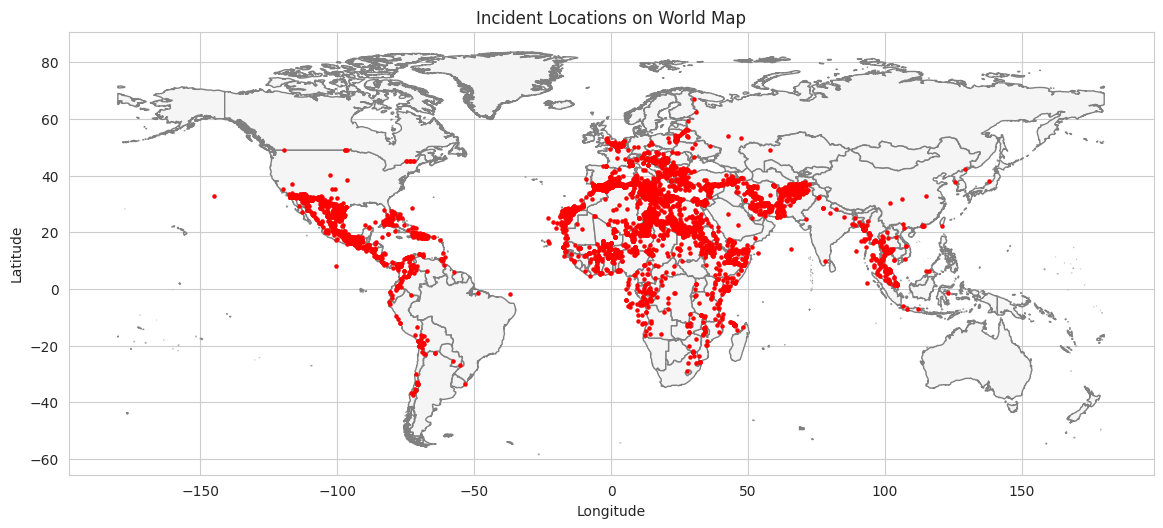

In [402]:
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color='whitesmoke', edgecolor='grey')
geo_df.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('Incident Locations on World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [403]:
geo_df.crs= 'epsg:4326'

In [404]:
!pip install contextily
import contextily as ctx

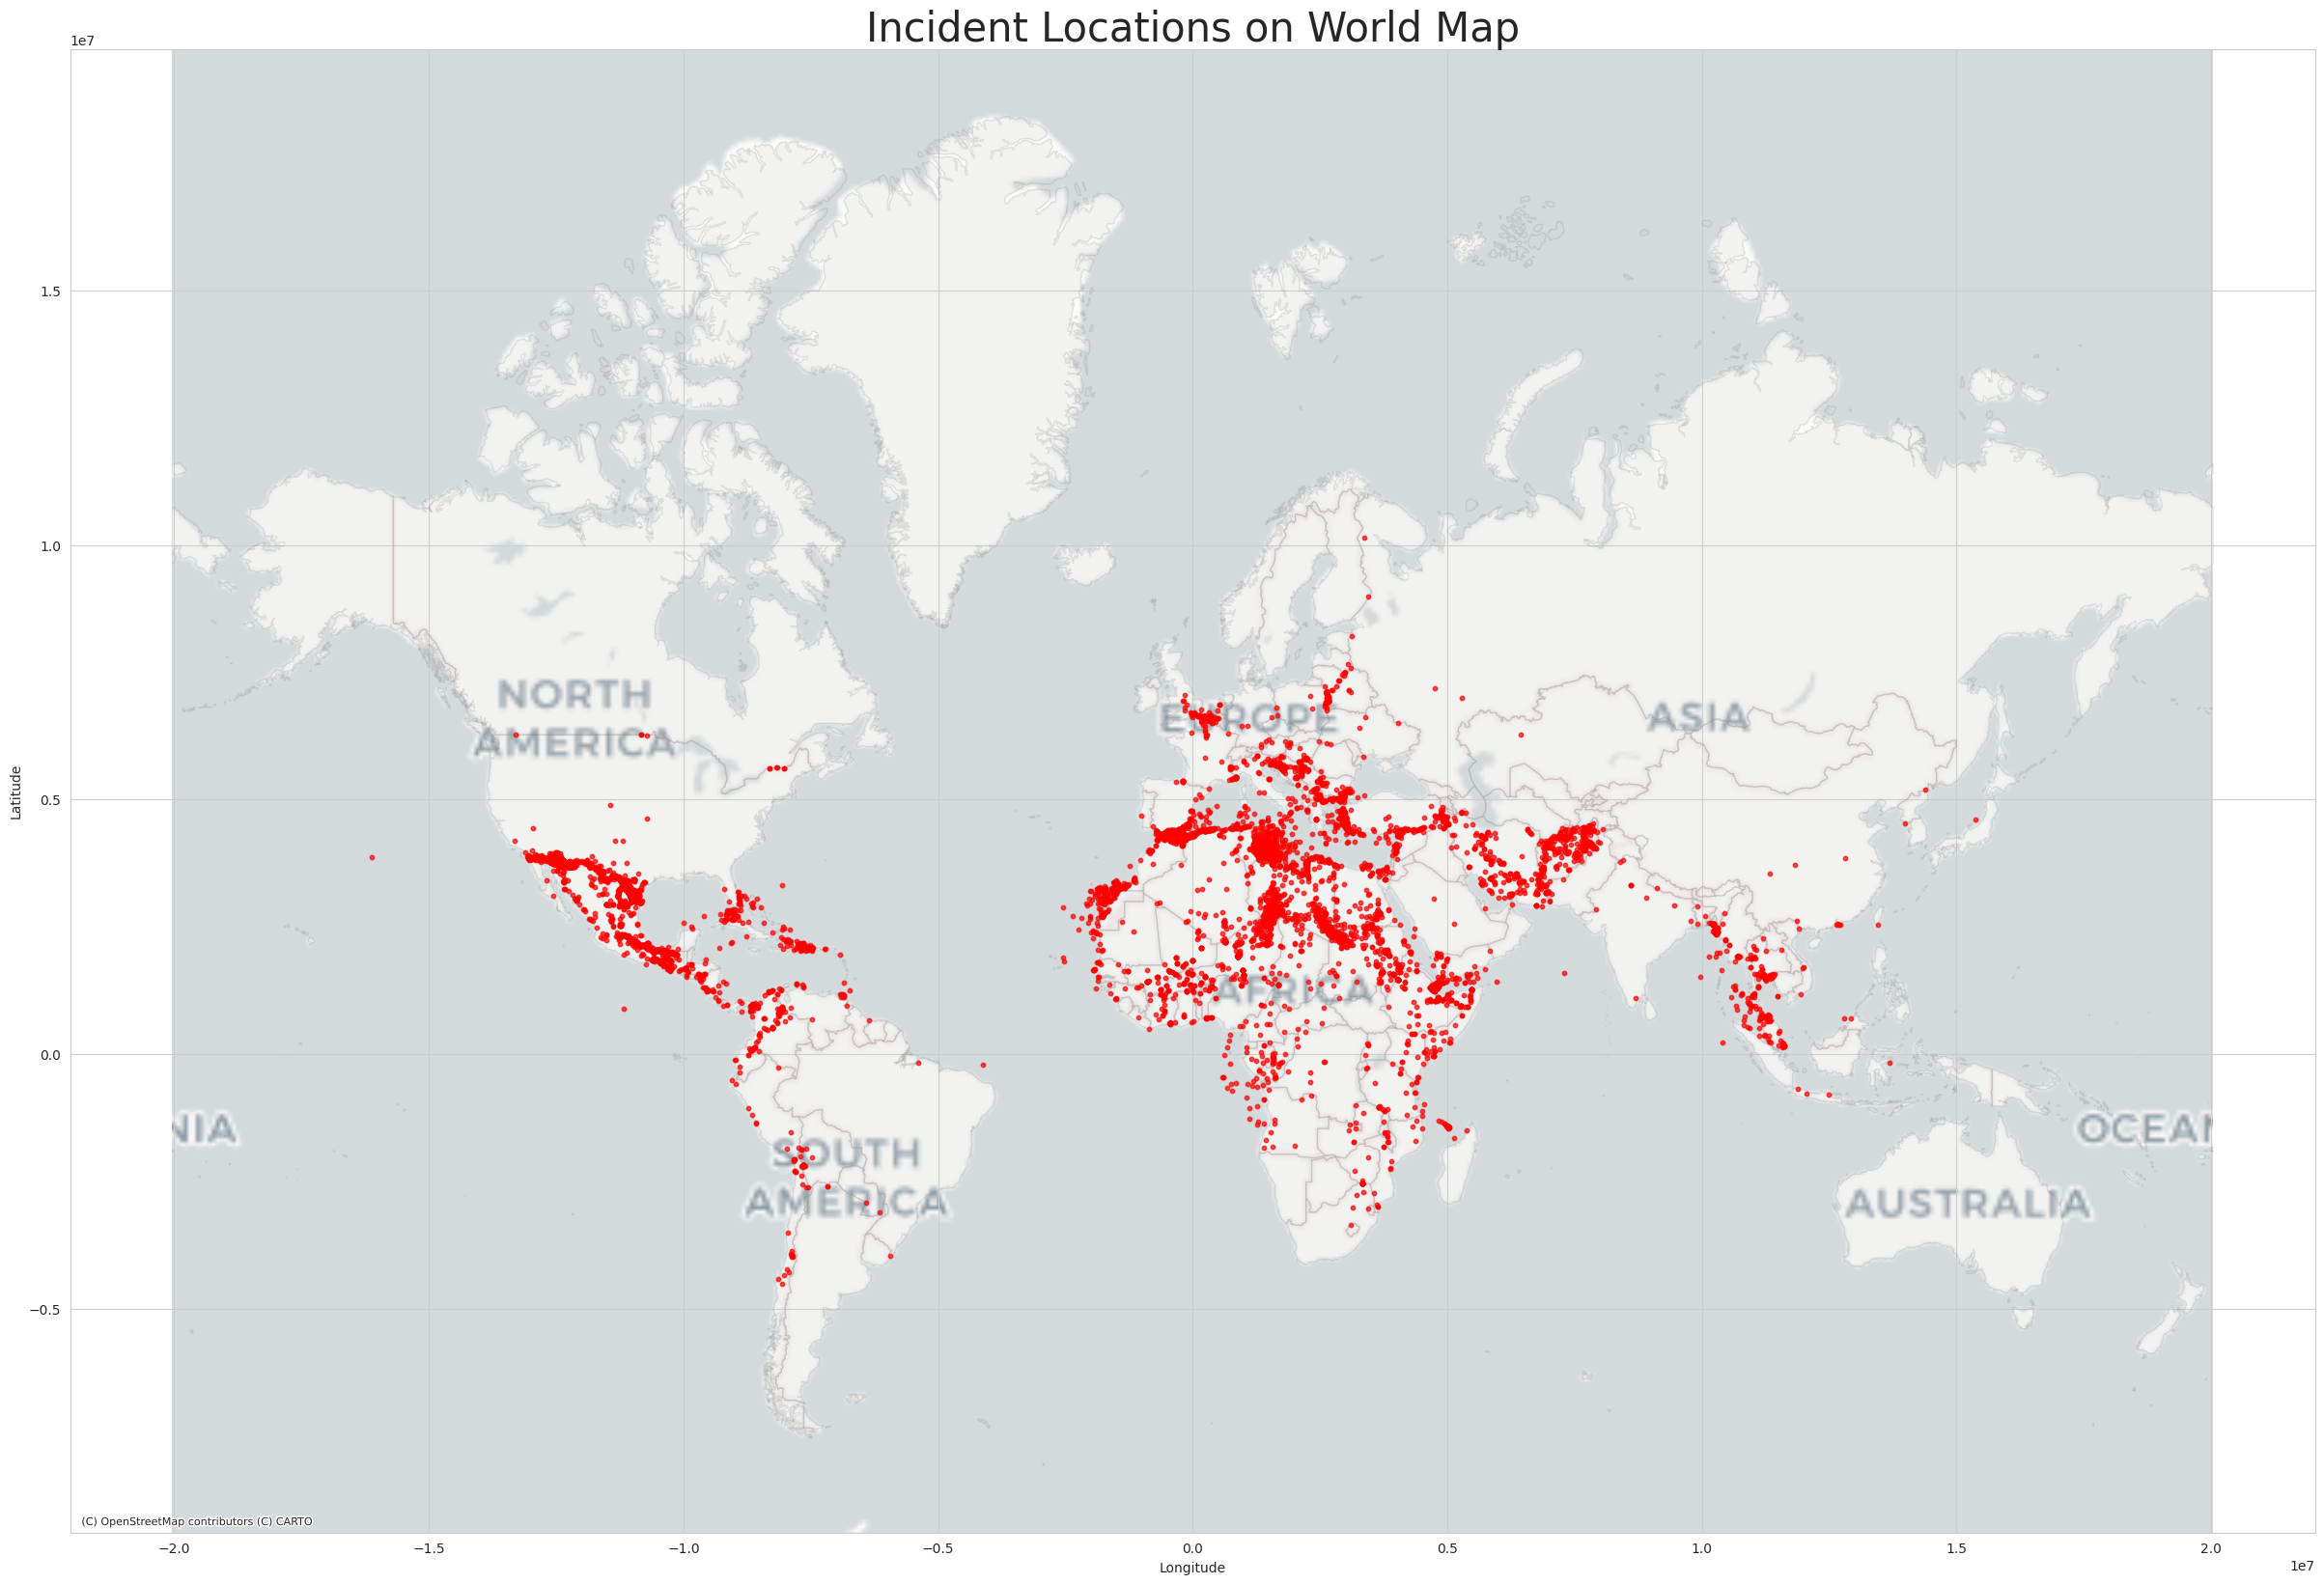

In [405]:
fig1, ax = plt.subplots(figsize=(30,30))
world.to_crs(epsg=3857).plot(ax=ax, alpha=0.2, color="lightgrey",edgecolor="grey")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
geo_df.to_crs(epsg=3857).plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.7)
plt.title('Incident Locations on World Map',fontsize=30)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [320]:
fig1.savefig("1incident_heatmap.png") # Save as png

###Migration Route


In [321]:
df["Migration route"].unique()

array(['US-Mexico border crossing', 'Unknown', 'Eastern Mediterranean',
       'English Channel to the UK', 'Caribbean to US',
       'Western Mediterranean', 'Central Mediterranean',
       'Haiti to Dominican Republic', 'Horn of Africa to Yemen crossing',
       'Sahara Desert crossing',
       'Western Africa / Atlantic route to the Canary Islands',
       'Syria to Türkiye', 'Western Balkans', 'Türkiye-Europe land route',
       'Dominican Republic to Puerto Rico', 'Comoros to Mayotte',
       'Venezuela to Caribbean', 'Darien', 'Iran to Türkiye',
       'Italy to France', 'Afghanistan to Iran', 'DRC to Uganda',
       'Central Mediterranean,Sahara Desert crossing',
       'Belarus-EU border', 'Ukraine to Europe',
       'Caribbean to Central America'], dtype=object)

In [322]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude'],
      dtype='object')

In [323]:
df_migration = df.groupby(["Latitude","Longitude"]).size().reset_index(name="Migration route")
df_migration

Latitude  Longitude  Migration route
0    -37.462916 -72.361225                1
1    -36.824943 -73.037945                1
2    -36.236267 -72.062608                1
3    -35.853050 -71.183332                1
4    -35.432707 -71.665835                1
...         ...        ...              ...
9577  56.090999  27.946380                2
9578  56.507839  27.342859                1
9579  59.155100  28.000000                1
9580  62.544340  31.007590                1
9581  66.929981  30.231360                1

[9582 rows x 3 columns]

In [324]:
df_migration1= df.groupby(["Latitude","Longitude","Migration route"])[["Latitude","Longitude"]].size().sort_values(ascending=False)
df_migration1.head(20)

Latitude   Longitude   Migration route                 
30.967040   61.820691  Afghanistan to Iran                 200
35.689409   51.389590  Afghanistan to Iran                  56
29.631863   52.512362  Afghanistan to Iran                  50
35.609483   51.514054  Afghanistan to Iran                  38
35.726282   51.373844  Afghanistan to Iran                  36
27.350227   62.353166  Afghanistan to Iran                  35
8.443908   -77.616875  Darien                               31
29.140356   58.178250  Afghanistan to Iran                  31
27.066317   14.333614  Sahara Desert crossing               30
27.022490   14.440990  Sahara Desert crossing               30
30.276294   57.066246  Afghanistan to Iran                  29
35.609483   51.514054  Afghanistan to Iran                  29
23.248841   19.724216  Sahara Desert crossing               28
31.764020   14.035110  Sahara Desert crossing               28
31.051243   61.501773  Afghanistan to Iran                  27
29.631863   52.512362  Afghanistan to Iran                  26
34.253372   14.498815  Central Mediterranean                26
19.635357   27.103538  Sahara Desert crossing               26
17.256207   43.202310  Horn of Africa to Yemen crossing     25
14.031672   35.341772  Sahara Desert crossing               25
dtype: int64

In [325]:
df_migration1= df.groupby(["Migration route"])[["Latitude","Longitude"]].size().sort_values(ascending=False)
df_migration1

Migration route
US-Mexico border crossing                                3392
Unknown                                                  3021
Sahara Desert crossing                                   2046
Central Mediterranean                                    1106
Afghanistan to Iran                                      1099
Western Mediterranean                                     614
Eastern Mediterranean                                     336
Western Africa / Atlantic route to the Canary Islands     226
Western Balkans                                           210
Horn of Africa to Yemen crossing                          161
Türkiye-Europe land route                                 157
English Channel to the UK                                 134
Syria to Türkiye                                          129
Darien                                                     98
Caribbean to US                                            63
Belarus-EU border                                          61
Dominican Republic to Puerto Rico                          42
Iran to Türkiye                                            34
Italy to France                                            33
Haiti to Dominican Republic                                17
Comoros to Mayotte                                         16
Venezuela to Caribbean                                     11
Ukraine to Europe                                           9
DRC to Uganda                                               3
Caribbean to Central America                                1
Central Mediterranean,Sahara Desert crossing                1
dtype: int64

In [326]:
df_migration1=df_migration1.rename("frequency")
df_migration1=df_migration1.head(10)
df_migration1

Migration route
US-Mexico border crossing                                3392
Unknown                                                  3021
Sahara Desert crossing                                   2046
Central Mediterranean                                    1106
Afghanistan to Iran                                      1099
Western Mediterranean                                     614
Eastern Mediterranean                                     336
Western Africa / Atlantic route to the Canary Islands     226
Western Balkans                                           210
Horn of Africa to Yemen crossing                          161
Name: frequency, dtype: int64

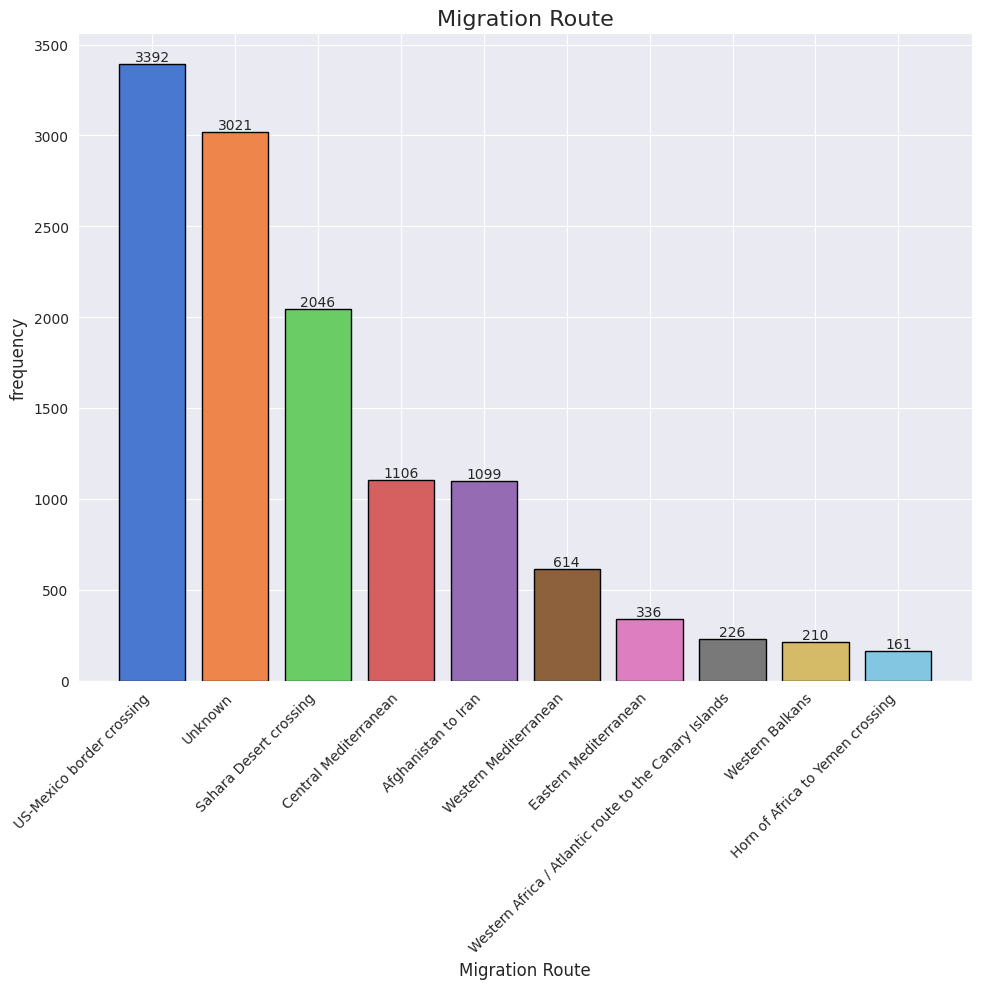

In [327]:
import seaborn as sns

sns.set_style("darkgrid")
palette=sns.color_palette("muted")
fig3,ax=plt.subplots(figsize=(10,10))
bars=ax.bar(df_migration1.index,
            height=df_migration1.values,
            color=palette,
            edgecolor="black",
            width=0.8
                  )
ax.bar_label(bars)
plt.title("Migration Route", fontsize=16)
plt.xlabel("Migration Route", fontsize=12)
plt.ylabel("frequency", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [328]:
fig3.savefig("Migration Route bar")

### Number analysis

#### Demographics Analysis

In [329]:
df.head()

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   
3      Incident           2014        January                Central America   
4      Incident           2014        January                Northern Africa   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala               1   
1      North America           Unknown               1   
2      North America           Unknown               1   
3      North America            Mexico               1   
4             Europe             Sudan               1   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Number of Survivors  ...  Number of Males  Number of Children  \
0                    0  ...                1                   0   
1                    0  ...                0                   0   
2                    0  ...                0                   0   
3                    0  ...                1                   0   
4                    2  ...                1                   0   

                                      Cause of Death  \
0                                   Mixed or unknown   
1                                   Mixed or unknown   
2                                   Mixed or unknown   
3                                           Violence   
4  Harsh environmental conditions / lack of adequ...   

             Migration route  \
0  US-Mexico border crossing   
1  US-Mexico border crossing   
2  US-Mexico border crossing   
3  US-Mexico border crossing   
4                    Unknown   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
4                  Border between Russia and Estonia   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   
3  Ministry of Foreign Affairs Mexico, Pima Count...  31.506777, -109.315632   
4                  EUBusiness (Agence France-Presse)             59.1551, 28   

  UNSD Geographical Grouping   Latitude   Longitude  
0           Northern America  31.650259 -110.366453  
1           Northern America  31.597130 -111.737560  
2           Northern America  31.940260 -113.011250  
3           Northern America  31.506777 -109.315632  
4            Northern Europe  59.155100   28.000000  

[5 rows x 21 columns]

In [330]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude'],
      dtype='object')

In [331]:
df[["Number of Males","Number of Females","Number of Children"]].isna().sum()

Number of Males       0
Number of Females     0
Number of Children    0
dtype: int64

In [332]:
df_analysis=pd.concat([df["Number of Males"],df["Number of Females"],df["Number of Children"]],axis=1)
df_analysis

Number of Males  Number of Females  Number of Children
0                    1                  0                   0
1                    0                  0                   0
2                    0                  0                   0
3                    1                  0                   0
4                    1                  0                   0
...                ...                ...                 ...
13015                4                  0                   0
13016                2                  0                   0
13017                0                  0                   0
13018                0                  0                   0
13019                0                  2                   0

[13020 rows x 3 columns]

In [333]:
sums=df_analysis.sum()
sums

Number of Males       14531
Number of Females      5968
Number of Children     3100
dtype: int64

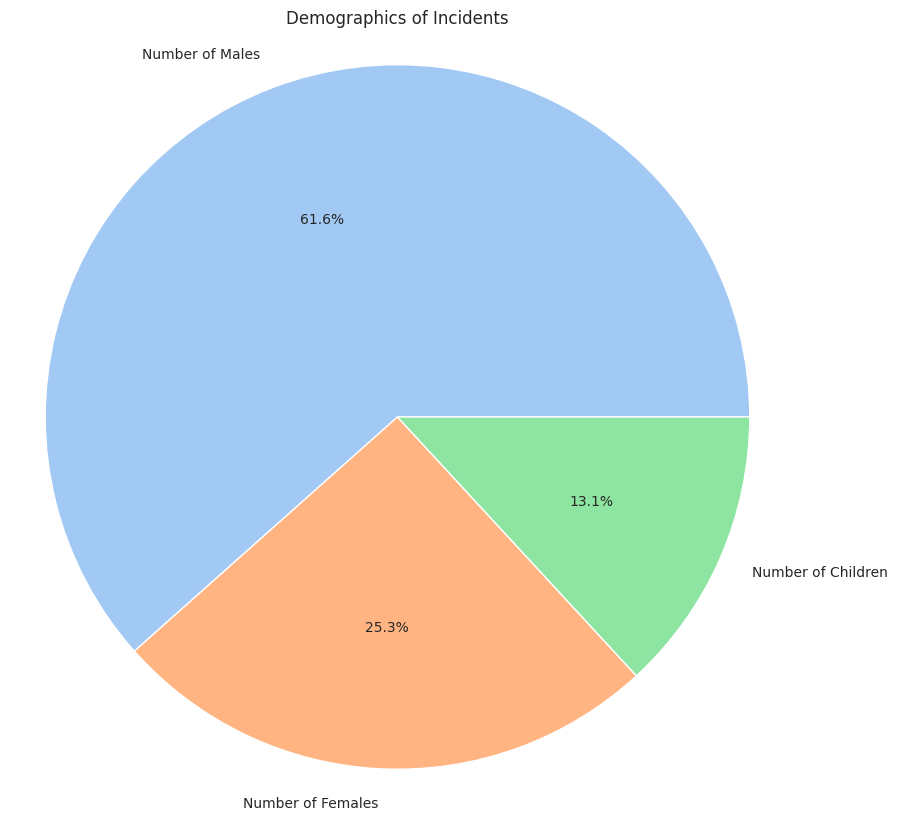

In [334]:
fig3,ax=plt.subplots(figsize=(10,10))
sns.set_style("darkgrid")
palette=sns.color_palette("muted")
ax.pie(sums,labels=sums.index,autopct="%1.1f%%")
ax.set_title("Demographics of Incidents")
ax.axis('equal')
plt.show()

In [335]:
fig3.savefig("Demographics of Incidents")

#### Region wise death


In [336]:
df.head()

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   
3      Incident           2014        January                Central America   
4      Incident           2014        January                Northern Africa   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala               1   
1      North America           Unknown               1   
2      North America           Unknown               1   
3      North America            Mexico               1   
4             Europe             Sudan               1   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Number of Survivors  ...  Number of Males  Number of Children  \
0                    0  ...                1                   0   
1                    0  ...                0                   0   
2                    0  ...                0                   0   
3                    0  ...                1                   0   
4                    2  ...                1                   0   

                                      Cause of Death  \
0                                   Mixed or unknown   
1                                   Mixed or unknown   
2                                   Mixed or unknown   
3                                           Violence   
4  Harsh environmental conditions / lack of adequ...   

             Migration route  \
0  US-Mexico border crossing   
1  US-Mexico border crossing   
2  US-Mexico border crossing   
3  US-Mexico border crossing   
4                    Unknown   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
4                  Border between Russia and Estonia   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   
3  Ministry of Foreign Affairs Mexico, Pima Count...  31.506777, -109.315632   
4                  EUBusiness (Agence France-Presse)             59.1551, 28   

  UNSD Geographical Grouping   Latitude   Longitude  
0           Northern America  31.650259 -110.366453  
1           Northern America  31.597130 -111.737560  
2           Northern America  31.940260 -113.011250  
3           Northern America  31.506777 -109.315632  
4            Northern Europe  59.155100   28.000000  

[5 rows x 21 columns]

In [337]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude'],
      dtype='object')

In [338]:
df_death=df[["Region of Incident","Number of Dead"]]
df_death

Region of Incident  Number of Dead
0          North America               1
1          North America               1
2          North America               1
3          North America               1
4                 Europe               1
...                  ...             ...
13015       Western Asia               4
13016       Western Asia               2
13017    Northern Africa              13
13018    Northern Africa               6
13019     Western Africa              16

[13020 rows x 2 columns]

In [339]:
df_death1=df_death.groupby("Region of Incident")["Number of Dead"].sum().sort_values(ascending=False)
df_death1=df_death1.head(10)
df_death1

Region of Incident
Mediterranean         9703
Northern Africa       5702
North America         3707
Southern Asia         2272
Western Africa        2180
Central America       2049
Western Asia          1931
Eastern Africa        1624
South-eastern Asia    1321
Europe                 962
Name: Number of Dead, dtype: int64

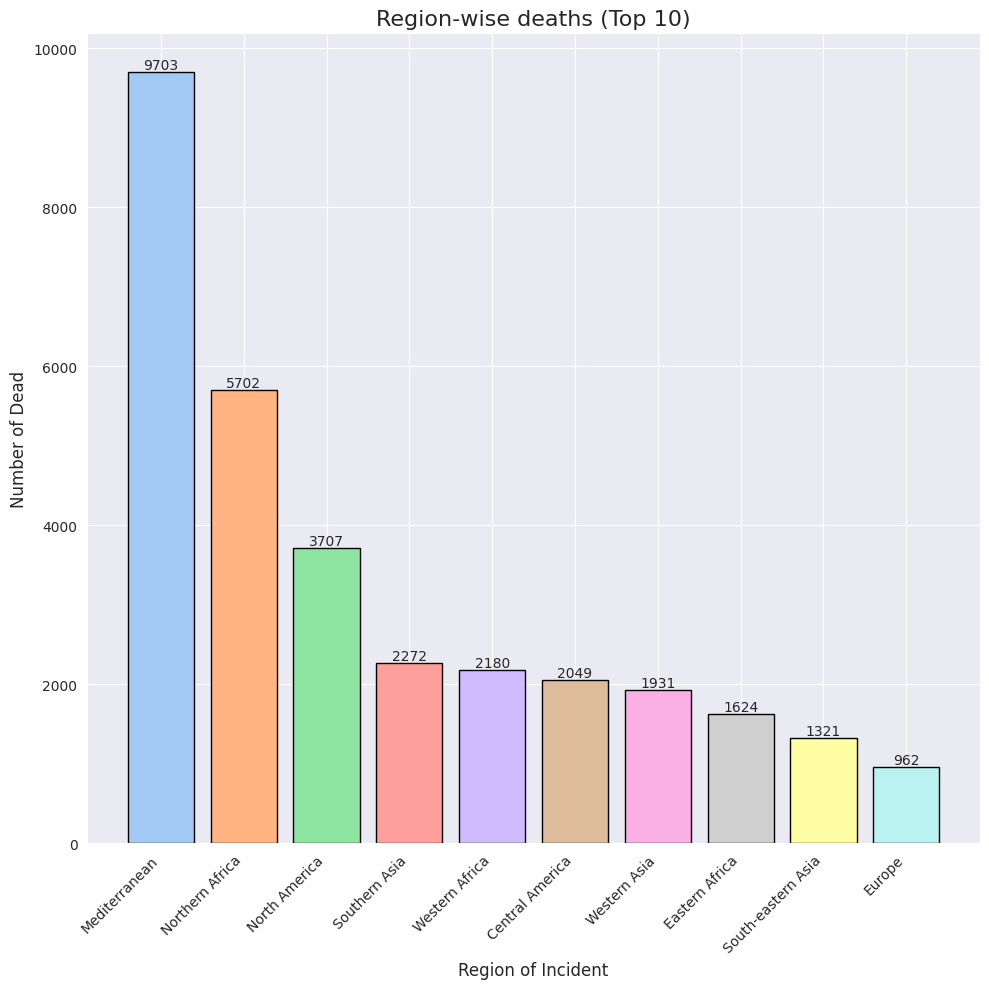

In [340]:
sns.set_style("darkgrid")
sns.set_palette("muted")
palette=sns.color_palette("pastel")
fig4,ax=plt.subplots(figsize=(10,10))
bars=ax.bar(df_death1.index,height=df_death1.values,color=palette,edgecolor="black")
ax.bar_label(bars)
plt.title("Region-wise deaths (Top 10)",fontsize=16)
plt.xlabel("Region of Incident",fontsize=12)
plt.ylabel("Number of Dead",fontsize=12)
plt.xticks(rotation=45,ha="right",fontsize=10)
plt.tight_layout()
plt.show()


In [341]:
fig4.savefig("1Region-wise deaths (Top 10)")

#### Causes of death

In [342]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude'],
      dtype='object')

In [343]:
df_cause=df[["Cause of Death","Number of Dead"]]
df_cause=df_cause.set_index("Cause of Death")
df_cause

Number of Dead
Cause of Death                                                    
Mixed or unknown                                                 1
Mixed or unknown                                                 1
Mixed or unknown                                                 1
Violence                                                         1
Harsh environmental conditions / lack of adequa...               1
...                                                            ...
Vehicle accident / death linked to hazardous tr...               4
Vehicle accident / death linked to hazardous tr...               2
Drowning                                                        13
Drowning                                                         6
Drowning                                                        16

[13020 rows x 1 columns]

In [344]:
df_cause=df_cause.groupby("Cause of Death")["Number of Dead"].sum().sort_values(ascending = False)
df_cause1=df_cause.head(5)
df_cause1

Cause of Death
Drowning                                                                  12578
Mixed or unknown                                                           6561
Vehicle accident / death linked to hazardous transport                     4887
Violence                                                                   3446
Harsh environmental conditions / lack of adequate shelter, food, water     2827
Name: Number of Dead, dtype: int64

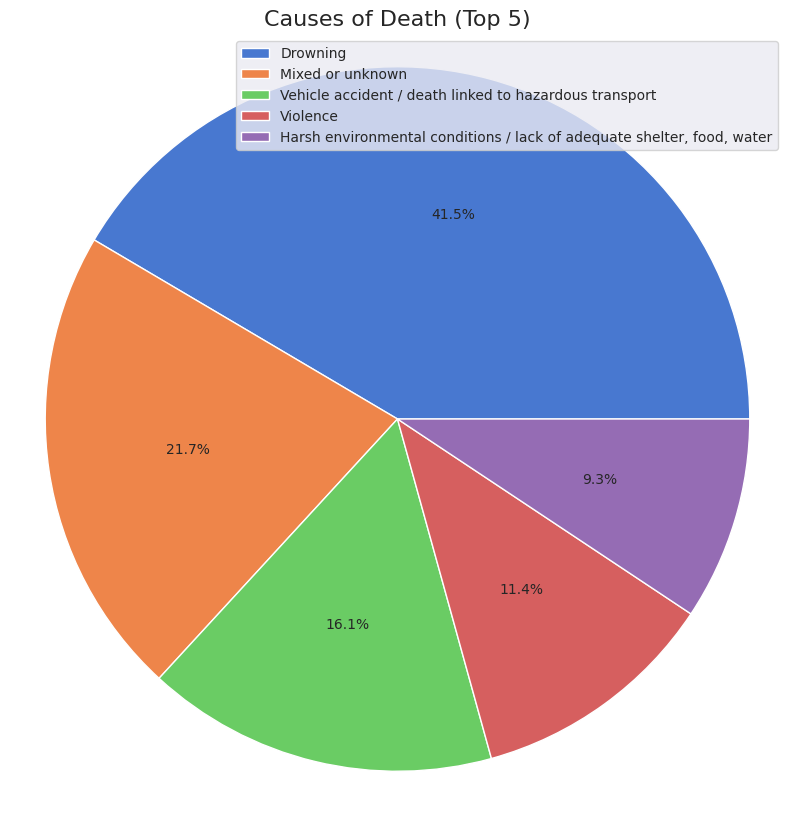

In [345]:
fig5,ax=plt.subplots(figsize=(10,10))
sns.set_style("darkgrid")
palette=sns.set_palette("pastel")
ax.pie(df_cause1,autopct="%1.1f%%")
ax.set_title("Causes of Death (Top 5)",fontsize=16)
plt.legend(df_cause1.index,loc="upper right")
ax.axis("equal")
plt.show()

In [346]:
fig5.savefig("1Causes of Death (Top 5)")

#### Drowning Analysis

In [347]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude'],
      dtype='object')

In [348]:
df_exp1=df[df["Cause of Death"]=="Drowning"]
df_exp1[["Region of Incident","Number of Dead","Number of Survivors","Latitude","Longitude"]]

Region of Incident  Number of Dead  Number of Survivors   Latitude  \
6          Mediterranean              12                    0  37.283200   
15             Caribbean               1                    0  26.116000   
24             Caribbean               8                    0  18.450500   
29        Eastern Africa              11                    0  20.280200   
36        Eastern Africa               1                   33  12.533100   
...                  ...             ...                  ...        ...   
13001      Mediterranean               1                    0  32.238125   
13008    Central America               1                    0  28.729477   
13017    Northern Africa              13                    6  23.728361   
13018    Northern Africa               6                   48  35.171874   
13019     Western Africa              16                    2  14.718707   

        Longitude  
6       27.000000  
15     -80.000000  
24     -68.000000  
29      39.000000  
36      48.000000  
...           ...  
13001   20.149743  
13008 -100.508222  
13017  -15.901632  
13018   -2.903182  
13019  -17.506255  

[3313 rows x 5 columns]

In [349]:
df_exp1_size=df_exp1.groupby("Region of Incident")["Number of Dead"].sum().sort_values(ascending=False)
df_exp1_size=df_exp1_size.head(10)
df_exp1_size


Region of Incident
Mediterranean         8361
Eastern Africa         712
Central America        679
South-eastern Asia     565
Western Asia           487
Northern Africa        439
North America          420
Caribbean              324
Europe                 186
Western Africa         136
Name: Number of Dead, dtype: int64

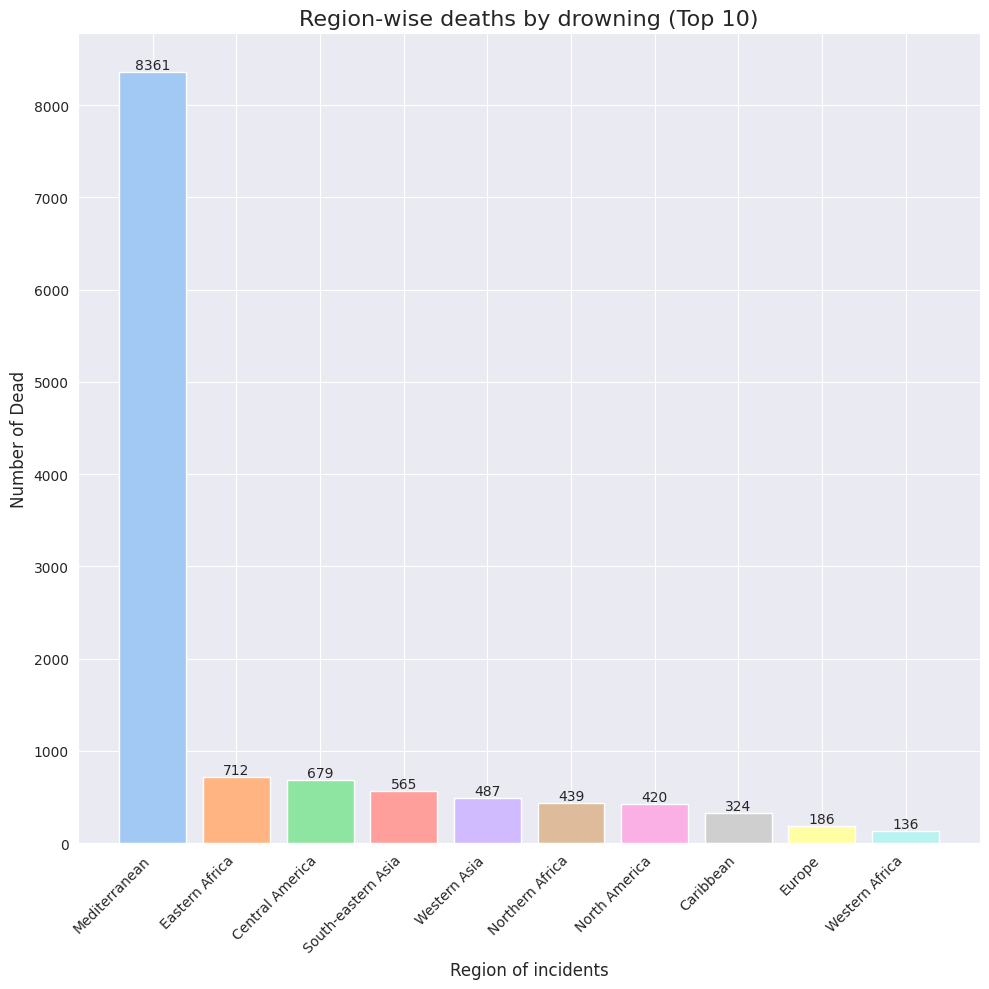

In [350]:
fig6,ax=plt.subplots(figsize=(10,10))
sns.set_style("darkgrid")
palette=sns.color_palette("pastel")
bars=ax.bar(df_exp1_size.index,height=df_exp1_size.values,color=palette,edgecolor="white")
ax.bar_label(bars)
plt.title("Region-wise deaths by drowning (Top 10)",fontsize=16)
plt.xlabel("Region of incidents",fontsize=12)
plt.ylabel("Number of Dead",fontsize=12)
plt.xticks(rotation=45,ha="right",fontsize=10)
plt.tight_layout()
plt.show()


In [351]:
df_expDead=df_exp1[["Number of Dead","Latitude","Longitude"]]
df_expDead

Number of Dead   Latitude   Longitude
6                  12  37.283200   27.000000
15                  1  26.116000  -80.000000
24                  8  18.450500  -68.000000
29                 11  20.280200   39.000000
36                  1  12.533100   48.000000
...               ...        ...         ...
13001               1  32.238125   20.149743
13008               1  28.729477 -100.508222
13017              13  23.728361  -15.901632
13018               6  35.171874   -2.903182
13019              16  14.718707  -17.506255

[3313 rows x 3 columns]

In [352]:
from shapely.geometry import Point
geometry=[Point(xy) for xy in zip(df_expDead["Longitude"],df_expDead["Latitude"])]
geo_dead=gpd.GeoDataFrame(df_expDead,geometry=geometry)


In [353]:
geo_dead

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


Number of Dead   Latitude   Longitude                     geometry
6                  12  37.283200   27.000000           POINT (27 37.2832)
15                  1  26.116000  -80.000000           POINT (-80 26.116)
24                  8  18.450500  -68.000000          POINT (-68 18.4505)
29                 11  20.280200   39.000000           POINT (39 20.2802)
36                  1  12.533100   48.000000           POINT (48 12.5331)
...               ...        ...         ...                          ...
13001               1  32.238125   20.149743    POINT (20.14974 32.23812)
13008               1  28.729477 -100.508222  POINT (-100.50822 28.72948)
13017              13  23.728361  -15.901632   POINT (-15.90163 23.72836)
13018               6  35.171874   -2.903182    POINT (-2.90318 35.17187)
13019              16  14.718707  -17.506255   POINT (-17.50626 14.71871)

[3313 rows x 4 columns]

In [354]:
world.head()

geo_point_2d  iso3  \
0  { "lon": 145.67921950822935, "lat": 15.0885200...   MNP   
1  { "lon": 147.1622109044358, "lat": 44.69121716...  None   
2  { "lon": 2.5519552167777979, "lat": 46.5645020...   FRA   
3  { "lon": 20.805271723235375, "lat": 44.0314984...   SRB   
4  { "lon": -56.012396377882979, "lat": -32.79964...   URY   

                  status color_code                      name continent  \
0           US Territory        USA  Northern Mariana Islands   Oceania   
1  Sovereignty unsettled        RUS             Kuril Islands      Asia   
2           Member State        FRA                    France    Europe   
3           Member State        SRB                    Serbia    Europe   
4           Member State        URY                   Uruguay  Americas   

            region iso_3166_1_alpha_2_codes              french_short  \
0       Micronesia                       MP  Northern Mariana Islands   
1     Eastern Asia                     None             Kuril Islands   
2   Western Europe                       FR                    France   
3  Southern Europe                       RS                    Serbie   
4    South America                       UY                   Uruguay   

                                            geometry  
0  MULTIPOLYGON (((145.63331 14.91236, 145.62412 ...  
1  MULTIPOLYGON (((146.68274 43.70777, 146.66664 ...  
2  MULTIPOLYGON (((9.4475 42.68305, 9.45014 42.63...  
3  POLYGON ((20.26102 46.11485, 20.31403 46.06986...  
4  POLYGON ((-53.3743 -33.74067, -53.39917 -33.75...

In [355]:
geo_dead.crs='epsg:4326'

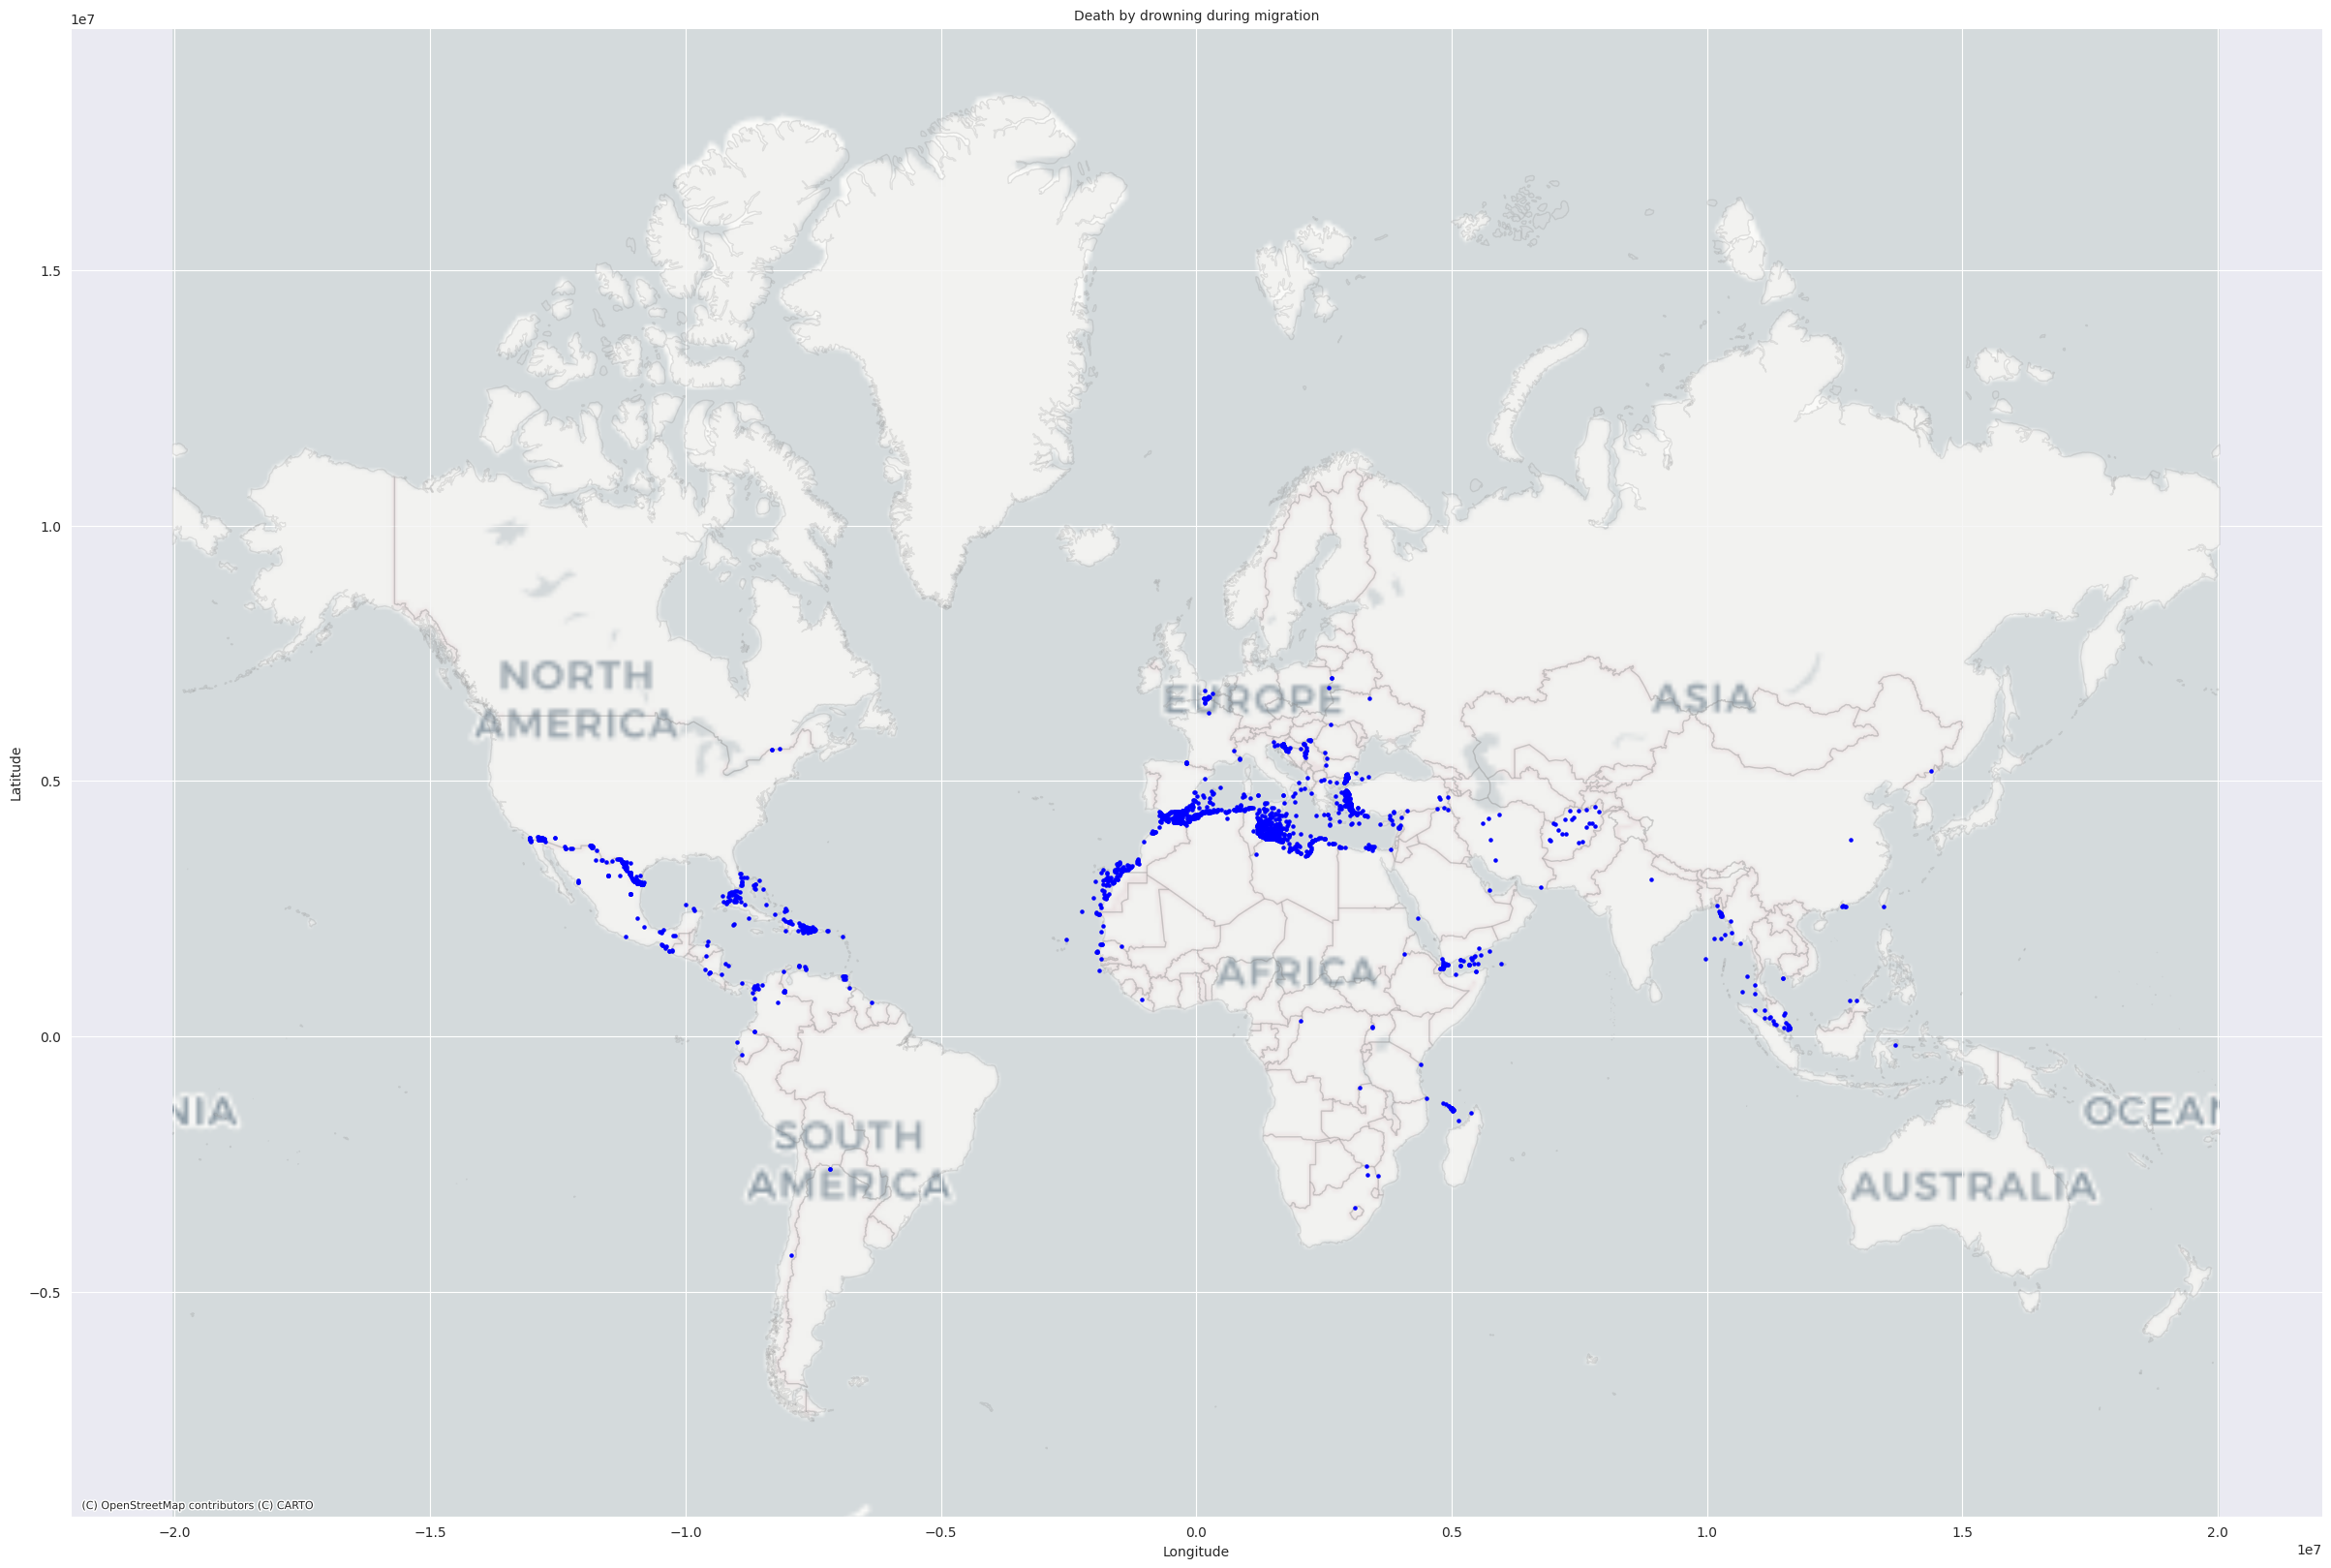

In [356]:
fig7,ax=plt.subplots(figsize=(30,30))
world.to_crs(epsg=3857).plot(ax=ax,alpha=0.2,color="lightgrey",edgecolor="grey")
geo_dead.to_crs(epsg=3857).plot(ax=ax,alpha=1,color="blue",marker='o',markersize=5)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Death by drowning during migration',fontsize=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [357]:
fig6.savefig("1Death by drowning during migration bar")

In [358]:
fig7.savefig("Death by drowning during migration")

#### Time line analysis


In [359]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude'],
      dtype='object')

In [360]:
df[["Incident year","Number of Dead","Number of Survivors","Minimum Estimated Number of Missing"]]

Incident year  Number of Dead  Number of Survivors  \
0               2014               1                    0   
1               2014               1                    0   
2               2014               1                    0   
3               2014               1                    0   
4               2014               1                    2   
...              ...             ...                  ...   
13015           2023               4                    0   
13016           2023               2                    0   
13017           2023              13                    6   
13018           2023               6                   48   
13019           2023              16                    2   

       Minimum Estimated Number of Missing  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  
...                                    ...  
13015                                    0  
13016                                    0  
13017                                    0  
13018                                    0  
13019                                   37  

[13020 rows x 4 columns]

In [361]:
df_year_dead=df.groupby("Incident year")["Number of Dead"].sum()
df_year_dead

Incident year
2014    1753
2015    4094
2016    4294
2017    3726
2018    3203
2019    3622
2020    2354
2021    3651
2022    4296
2023    1725
Name: Number of Dead, dtype: int64

Text(0, 0.5, 'Number of Dead')

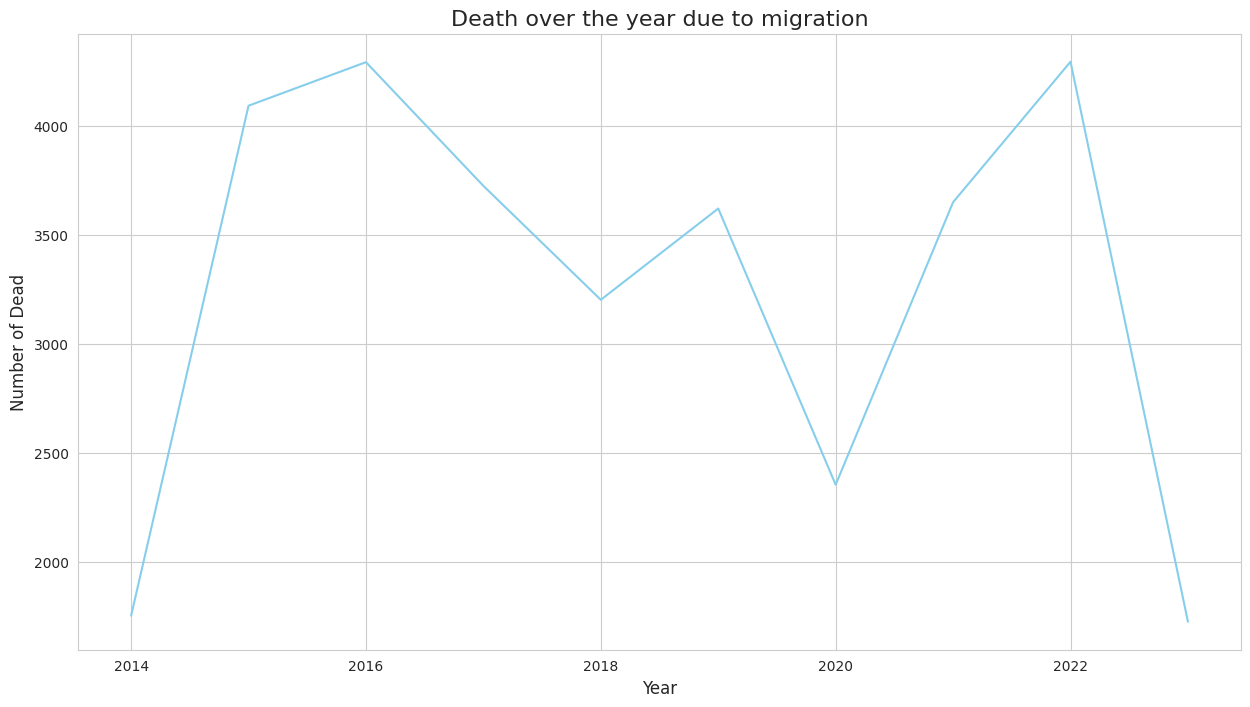

In [362]:
sns.set_style("whitegrid")
palette=sns.color_palette("pastel")
fig8,ax=plt.subplots(figsize=(15,8))
bars=sns.lineplot(ax=ax,x=df_year_dead.index,y=df_year_dead.values,color="skyblue")
ax.set_title("Number of Dead per year",fontsize=16)
plt.title("Death over the year due to migration",fontsize=16)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of Dead",fontsize=12)

In [363]:
df_year_dead1=df.groupby("Incident year")["Number of Survivors"].sum()
df_year_dead1

Incident year
2014     6142
2015     8100
2016    17113
2017     6888
2018     8331
2019     4936
2020     6787
2021     9765
2022    12771
2023     4503
Name: Number of Survivors, dtype: int64

In [364]:
df_year_dead2=df.groupby("Incident year")["Minimum Estimated Number of Missing"].sum()
df_year_dead2

Incident year
2014    3568
2015    2663
2016    3784
2017    2564
2018    1806
2019    1796
2020    1947
2021    2500
2022    2768
2023    1409
Name: Minimum Estimated Number of Missing, dtype: int64

In [365]:
df_year_final=pd.concat([df_year_dead,df_year_dead1,df_year_dead2],axis=1)
df_year_final

Number of Dead  Number of Survivors  \
Incident year                                        
2014                     1753                 6142   
2015                     4094                 8100   
2016                     4294                17113   
2017                     3726                 6888   
2018                     3203                 8331   
2019                     3622                 4936   
2020                     2354                 6787   
2021                     3651                 9765   
2022                     4296                12771   
2023                     1725                 4503   

               Minimum Estimated Number of Missing  
Incident year                                       
2014                                          3568  
2015                                          2663  
2016                                          3784  
2017                                          2564  
2018                                          1806  
2019                                          1796  
2020                                          1947  
2021                                          2500  
2022                                          2768  
2023                                          1409

Text(0, 0.5, 'Total')

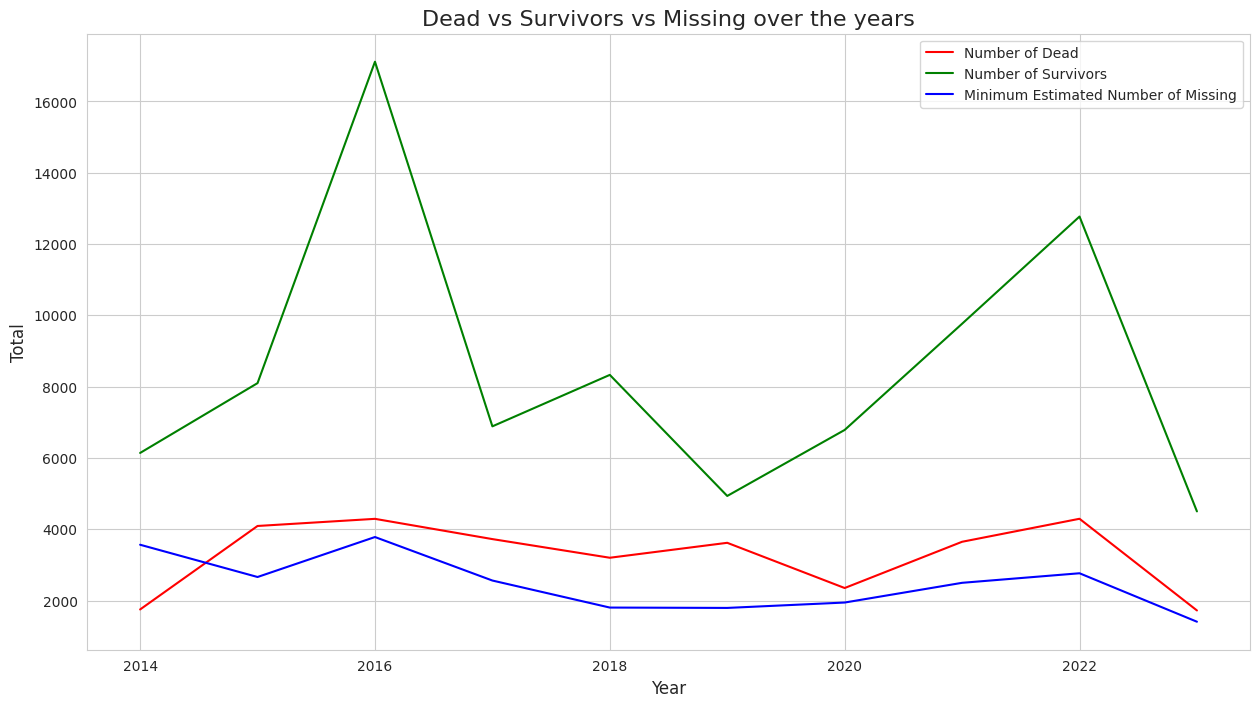

In [366]:
sns.set_style("whitegrid")
palette=sns.color_palette("pastel")
fig9,ax=plt.subplots(figsize=(15,8))
df_year_final.plot(ax=ax,kind="line",color=["red","green","blue"])
plt.title("Dead vs Survivors vs Missing over the years",fontsize=16)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Total",fontsize=12)

In [367]:
fig8.savefig("Number of Dead per year")

In [368]:
fig9.savefig("Dead,survivors,missing")

####Region of Origin


In [369]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude'],
      dtype='object')

In [370]:
df.head()

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   
3      Incident           2014        January                Central America   
4      Incident           2014        January                Northern Africa   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala               1   
1      North America           Unknown               1   
2      North America           Unknown               1   
3      North America            Mexico               1   
4             Europe             Sudan               1   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Number of Survivors  ...  Number of Males  Number of Children  \
0                    0  ...                1                   0   
1                    0  ...                0                   0   
2                    0  ...                0                   0   
3                    0  ...                1                   0   
4                    2  ...                1                   0   

                                      Cause of Death  \
0                                   Mixed or unknown   
1                                   Mixed or unknown   
2                                   Mixed or unknown   
3                                           Violence   
4  Harsh environmental conditions / lack of adequ...   

             Migration route  \
0  US-Mexico border crossing   
1  US-Mexico border crossing   
2  US-Mexico border crossing   
3  US-Mexico border crossing   
4                    Unknown   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
4                  Border between Russia and Estonia   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   
3  Ministry of Foreign Affairs Mexico, Pima Count...  31.506777, -109.315632   
4                  EUBusiness (Agence France-Presse)             59.1551, 28   

  UNSD Geographical Grouping   Latitude   Longitude  
0           Northern America  31.650259 -110.366453  
1           Northern America  31.597130 -111.737560  
2           Northern America  31.940260 -113.011250  
3           Northern America  31.506777 -109.315632  
4            Northern Europe  59.155100   28.000000  

[5 rows x 21 columns]

In [371]:
df["Incident"]=df["Total Number of Dead and Missing"]+df["Number of Survivors"]
df["Incident"].count()

13020

In [372]:
df[["Region of Origin","Region of Incident","Incident"]]

Region of Origin Region of Incident  Incident
0                    Central America      North America         1
1      Latin America / Caribbean (P)      North America         1
2      Latin America / Caribbean (P)      North America         1
3                    Central America      North America         1
4                    Northern Africa             Europe         3
...                              ...                ...       ...
13015                   Western Asia       Western Asia         4
13016             Western Africa (P)       Western Asia         2
13017                 Western Africa    Northern Africa        19
13018                          Mixed    Northern Africa        54
13019             Western Africa (P)     Western Africa        55

[13020 rows x 3 columns]

In [373]:
df_migrating=df.groupby("Region of Origin")["Incident"].size().sort_values(ascending=False)
df_migrating=df_migrating.head(10)
df_migrating
df_migrating=df_migrating.reset_index().set_index("Region of Origin")
df_migrating


Incident
Region of Origin                       
Latin America / Caribbean (P)      2164
Southern Asia                      1904
Unknown                            1756
Central America                    1565
Sub-Saharan Africa (P)             1528
Eastern Africa (P)                 1133
Northern Africa                     455
Western Asia                        432
South America                       322
Eastern Africa                      298

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Latin America / Caribbean (P)'),
  Text(1, 0, 'Southern Asia'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Central America'),
  Text(4, 0, 'Sub-Saharan Africa (P)'),
  Text(5, 0, 'Eastern Africa (P)'),
  Text(6, 0, 'Northern Africa'),
  Text(7, 0, 'Western Asia'),
  Text(8, 0, 'South America'),
  Text(9, 0, 'Eastern Africa')])

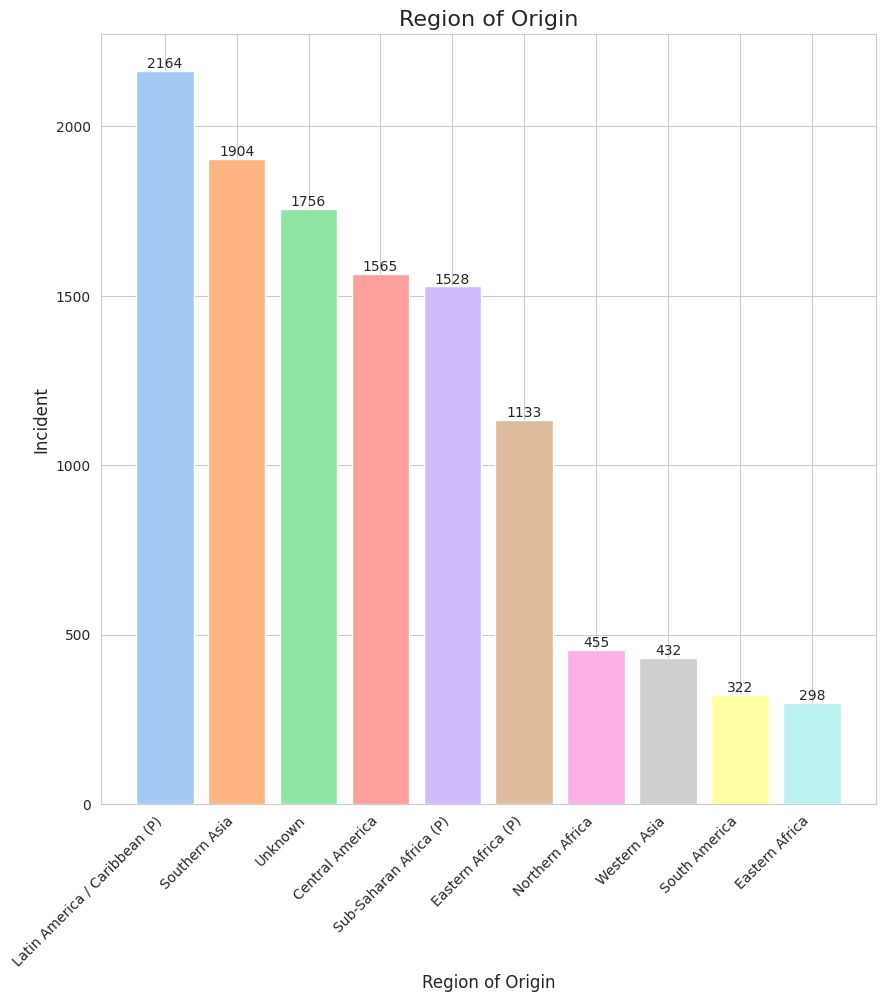

In [374]:
sns.set_style("whitegrid")
palette=sns.color_palette("pastel")
fig10,ax=plt.subplots(figsize=(10,10))
bars=ax.bar(df_migrating.index,df_migrating["Incident"],color=palette,edgecolor="white")
ax.bar_label(bars)
plt.title("Region of Origin",fontsize=16)
plt.xlabel("Region of Origin",fontsize=12)
plt.ylabel("Incident",fontsize=12)
plt.xticks(rotation=45,ha="right",fontsize=10)


In [375]:
fig10.savefig("Migrating Region")

####Country affected with highest migration incident

In [376]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude', 'Incident'],
      dtype='object')

In [377]:
df_incident_region=df[["Incident year","Region of Incident","Incident"]]
df_incident_region

Incident year Region of Incident  Incident
0               2014      North America         1
1               2014      North America         1
2               2014      North America         1
3               2014      North America         1
4               2014             Europe         3
...              ...                ...       ...
13015           2023       Western Asia         4
13016           2023       Western Asia         2
13017           2023    Northern Africa        19
13018           2023    Northern Africa        54
13019           2023     Western Africa        55

[13020 rows x 3 columns]

In [378]:
df_incident_region1=df_incident_region.groupby(["Region of Incident"])["Incident"].size().sort_values(ascending=False)
df_incident_region1=df_incident_region1.head(10)
df_incident_region1


Region of Incident
North America         2706
Mediterranean         2055
Northern Africa       2014
Southern Asia         1673
Central America       1375
Western Africa         967
Europe                 619
Eastern Africa         489
Western Asia           414
South-eastern Asia     237
Name: Incident, dtype: int64

In [379]:
df_north=df[(df["Region of Incident"]=="North America")]
df_north=df_north[["Region of Incident","Incident year","Incident","Number of Dead","Minimum Estimated Number of Missing","Number of Survivors"]]
df_north=df_north[["Incident year","Incident","Number of Dead","Minimum Estimated Number of Missing","Number of Survivors"]]
df_north=df_north.set_index("Incident year")
df_north


Incident  Number of Dead  Minimum Estimated Number of Missing  \
Incident year                                                                  
2014                  1               1                                    0   
2014                  1               1                                    0   
2014                  1               1                                    0   
2014                  1               1                                    0   
2014                  1               1                                    0   
...                 ...             ...                                  ...   
2023                  1               1                                    0   
2023                  1               1                                    0   
2023                  1               1                                    0   
2023                  1               0                                    1   
2023                  1               1                                    0   

               Number of Survivors  
Incident year                       
2014                             0  
2014                             0  
2014                             0  
2014                             0  
2014                             0  
...                            ...  
2023                             0  
2023                             0  
2023                             0  
2023                             0  
2023                             0  

[2706 rows x 4 columns]

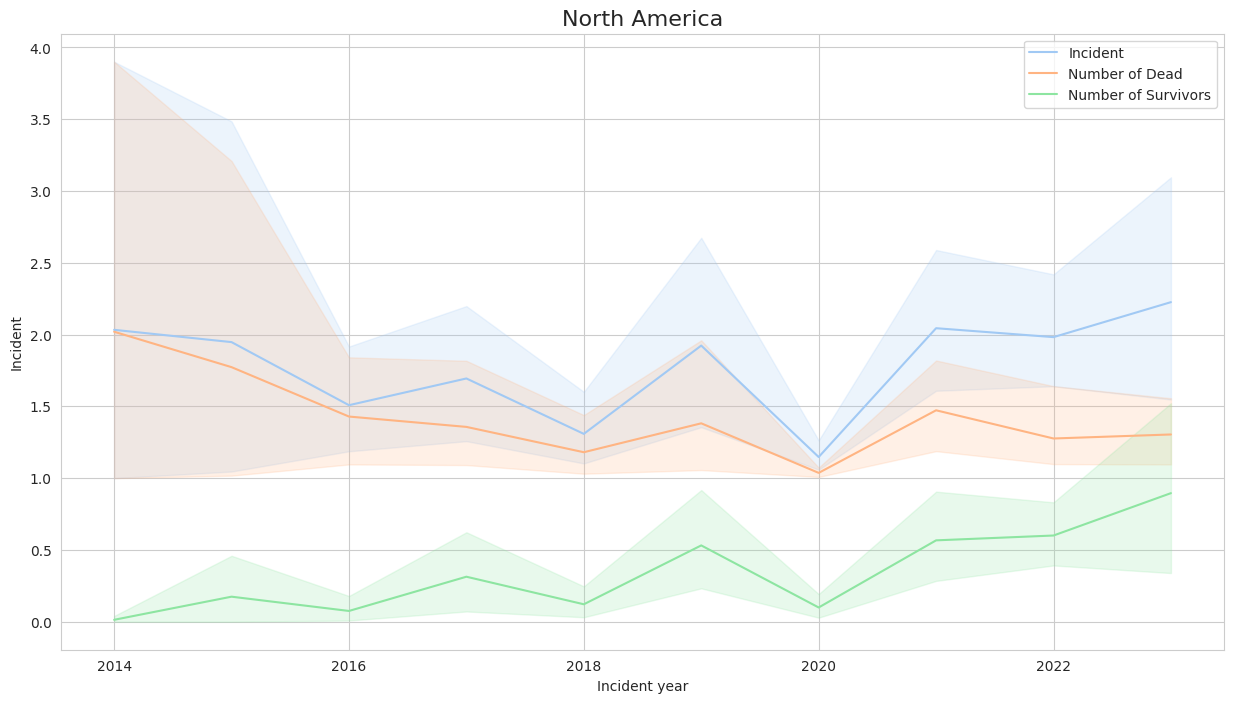

In [380]:
sns.set_style("whitegrid")
palette=sns.color_palette("pastel")
fig11,ax=plt.subplots(figsize=(15,8))
sns.lineplot(x="Incident year",y="Incident",ax=ax,data=df_north,label="Incident")
sns.lineplot(x="Incident year",y="Number of Dead",ax=ax,data=df_north,label="Number of Dead")
sns.lineplot(x="Incident year",y="Number of Survivors",ax=ax,data=df_north,label="Number of Survivors")
plt.title("North America",fontsize=16)
plt.show()

In [381]:
fig11.savefig("North America Migration trend over the year")

#### 2nd Round of Analysis


In [382]:
df.head()

Incident Type  Incident year Reported Month               Region of Origin  \
0      Incident           2014        January                Central America   
1      Incident           2014        January  Latin America / Caribbean (P)   
2      Incident           2014        January  Latin America / Caribbean (P)   
3      Incident           2014        January                Central America   
4      Incident           2014        January                Northern Africa   

  Region of Incident Country of Origin  Number of Dead  \
0      North America         Guatemala               1   
1      North America           Unknown               1   
2      North America           Unknown               1   
3      North America            Mexico               1   
4             Europe             Sudan               1   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  \
0                                    0                                 1   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Number of Survivors  ...  Number of Children  \
0                    0  ...                   0   
1                    0  ...                   0   
2                    0  ...                   0   
3                    0  ...                   0   
4                    2  ...                   0   

                                      Cause of Death  \
0                                   Mixed or unknown   
1                                   Mixed or unknown   
2                                   Mixed or unknown   
3                                           Violence   
4  Harsh environmental conditions / lack of adequ...   

             Migration route  \
0  US-Mexico border crossing   
1  US-Mexico border crossing   
2  US-Mexico border crossing   
3  US-Mexico border crossing   
4                    Unknown   

                                   Location of death  \
0  Pima Country Office of the Medical Examiner ju...   
1  Pima Country Office of the Medical Examiner ju...   
2  Pima Country Office of the Medical Examiner ju...   
3                         near Douglas, Arizona, USA   
4                  Border between Russia and Estonia   

                                  Information Source             Coordinates  \
0  Pima County Office of the Medical Examiner (PC...  31.650259, -110.366453   
1  Pima County Office of the Medical Examiner (PC...    31.59713, -111.73756   
2  Pima County Office of the Medical Examiner (PC...    31.94026, -113.01125   
3  Ministry of Foreign Affairs Mexico, Pima Count...  31.506777, -109.315632   
4                  EUBusiness (Agence France-Presse)             59.1551, 28   

  UNSD Geographical Grouping   Latitude   Longitude  Incident  
0           Northern America  31.650259 -110.366453         1  
1           Northern America  31.597130 -111.737560         1  
2           Northern America  31.940260 -113.011250         1  
3           Northern America  31.506777 -109.315632         1  
4            Northern Europe  59.155100   28.000000         3  

[5 rows x 22 columns]

In [383]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude', 'Incident'],
      dtype='object')

####Incident graph

In [384]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude', 'Incident'],
      dtype='object')

In [385]:
df_incident = df[["Region of Incident","Incident"]]
df_incident

Region of Incident  Incident
0          North America         1
1          North America         1
2          North America         1
3          North America         1
4                 Europe         3
...                  ...       ...
13015       Western Asia         4
13016       Western Asia         2
13017    Northern Africa        19
13018    Northern Africa        54
13019     Western Africa        55

[13020 rows x 2 columns]

In [386]:
df_incident=df_incident.groupby("Region of Incident")["Incident"].size().sort_values(ascending=False)
df_incident=df_incident.head(5)
df_incident

Region of Incident
North America      2706
Mediterranean      2055
Northern Africa    2014
Southern Asia      1673
Central America    1375
Name: Incident, dtype: int64

Text(74.59722222222221, 0.5, 'Incident')

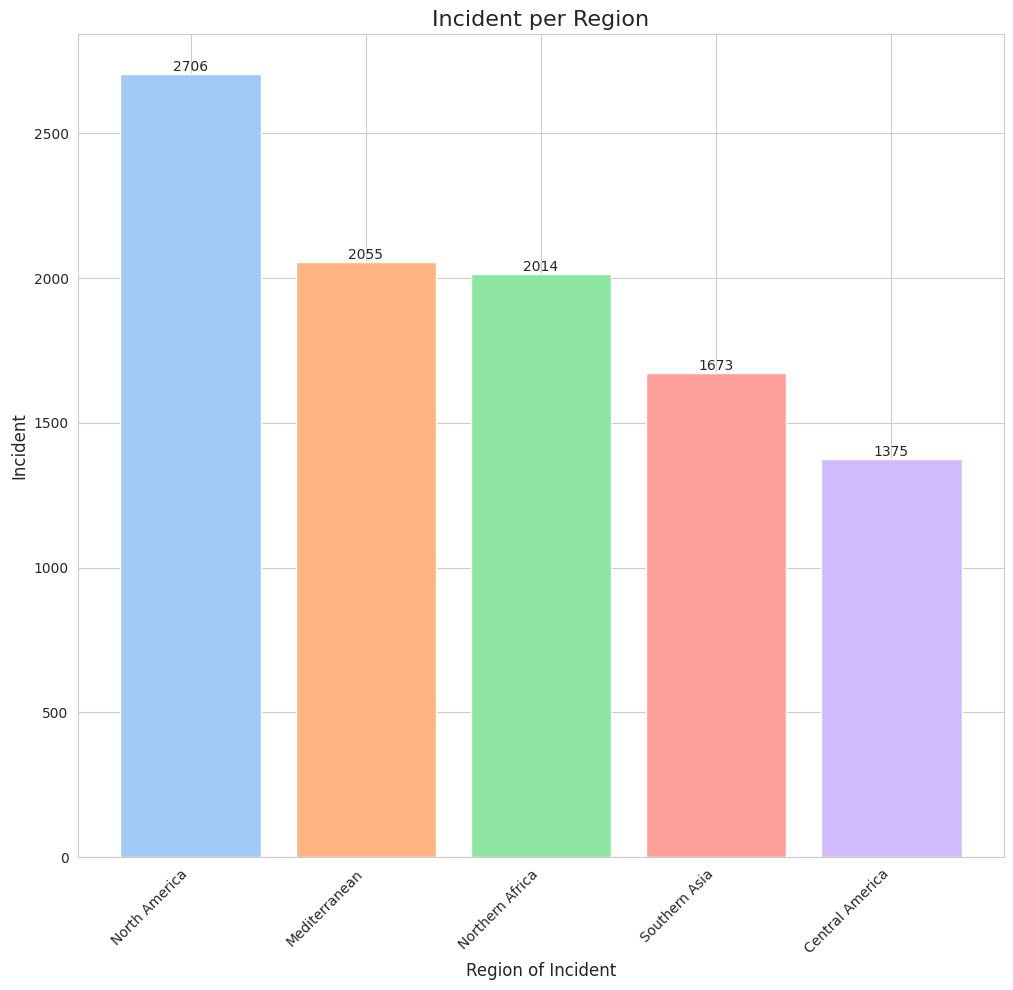

In [387]:
sns.set_style("whitegrid")
palette=sns.color_palette("pastel")
fig13,ax=plt.subplots(figsize=(10,10))
bars=ax.bar(df_incident.index,df_incident.values,color=palette,edgecolor="white")
ax.bar_label(bars)
plt.title("Incident per Region",fontsize=16)
plt.xlabel("Region of Incident",fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.ylabel("Incident",fontsize=12)

In [388]:
fig13.savefig("1Incident per Region")

#### Safest Migration route

In [389]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping',
       'Latitude', 'Longitude', 'Incident'],
      dtype='object')

In [390]:
df_saferoute=df[["Migration route","Number of Survivors","Incident"]]
df_saferoute

Migration route  Number of Survivors  \
0                              US-Mexico border crossing                    0   
1                              US-Mexico border crossing                    0   
2                              US-Mexico border crossing                    0   
3                              US-Mexico border crossing                    0   
4                                                Unknown                    2   
...                                                  ...                  ...   
13015                          Türkiye-Europe land route                    0   
13016                          Türkiye-Europe land route                    0   
13017  Western Africa / Atlantic route to the Canary ...                    6   
13018  Western Africa / Atlantic route to the Canary ...                   48   
13019  Western Africa / Atlantic route to the Canary ...                    2   

       Incident  
0             1  
1             1  
2             1  
3             1  
4             3  
...         ...  
13015         4  
13016         2  
13017        19  
13018        54  
13019        55  

[13020 rows x 3 columns]

In [391]:
df_saferoute["%survivor"]=df_saferoute["Number of Survivors"]/df_saferoute["Incident"]*100
df_saferoute=df_saferoute.round(2)
df_saferoute

<ipython-input-391-d5611c5ed7af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saferoute["%survivor"]=df_saferoute["Number of Survivors"]/df_saferoute["Incident"]*100


Migration route  Number of Survivors  \
0                              US-Mexico border crossing                    0   
1                              US-Mexico border crossing                    0   
2                              US-Mexico border crossing                    0   
3                              US-Mexico border crossing                    0   
4                                                Unknown                    2   
...                                                  ...                  ...   
13015                          Türkiye-Europe land route                    0   
13016                          Türkiye-Europe land route                    0   
13017  Western Africa / Atlantic route to the Canary ...                    6   
13018  Western Africa / Atlantic route to the Canary ...                   48   
13019  Western Africa / Atlantic route to the Canary ...                    2   

       Incident  %survivor  
0             1       0.00  
1             1       0.00  
2             1       0.00  
3             1       0.00  
4             3      66.67  
...         ...        ...  
13015         4       0.00  
13016         2       0.00  
13017        19      31.58  
13018        54      88.89  
13019        55       3.64  

[13020 rows x 4 columns]

In [392]:
df_saferoute=df_saferoute.groupby("Migration route")["%survivor"].mean().round(2)
df_saferoute=df_saferoute
df_saferoute

Migration route
Afghanistan to Iran                                       1.10
Belarus-EU border                                         6.60
Caribbean to Central America                              0.00
Caribbean to US                                          38.02
Central Mediterranean                                    29.66
Central Mediterranean,Sahara Desert crossing              0.00
Comoros to Mayotte                                       34.71
DRC to Uganda                                            38.70
Darien                                                    7.74
Dominican Republic to Puerto Rico                        36.21
Eastern Mediterranean                                    38.76
English Channel to the UK                                15.12
Haiti to Dominican Republic                              12.42
Horn of Africa to Yemen crossing                         36.60
Iran to Türkiye                                          25.85
Italy to France                                           3.43
Sahara Desert crossing                                    1.94
Syria to Türkiye                                          4.56
Türkiye-Europe land route                                11.55
US-Mexico border crossing                                 3.45
Ukraine to Europe                                        28.01
Unknown                                                   9.41
Venezuela to Caribbean                                   14.52
Western Africa / Atlantic route to the Canary Islands    50.03
Western Balkans                                          19.66
Western Mediterranean                                    21.97
Name: %survivor, dtype: float64

In [393]:
df_deadlyroute=df[["Migration route","Number of Dead","Incident"]]
df_deadlyroute

Migration route  Number of Dead  \
0                              US-Mexico border crossing               1   
1                              US-Mexico border crossing               1   
2                              US-Mexico border crossing               1   
3                              US-Mexico border crossing               1   
4                                                Unknown               1   
...                                                  ...             ...   
13015                          Türkiye-Europe land route               4   
13016                          Türkiye-Europe land route               2   
13017  Western Africa / Atlantic route to the Canary ...              13   
13018  Western Africa / Atlantic route to the Canary ...               6   
13019  Western Africa / Atlantic route to the Canary ...              16   

       Incident  
0             1  
1             1  
2             1  
3             1  
4             3  
...         ...  
13015         4  
13016         2  
13017        19  
13018        54  
13019        55  

[13020 rows x 3 columns]

In [394]:
df_deadlyroute["%dead"]=df_deadlyroute["Number of Dead"]/df_deadlyroute["Incident"]*100
df_deadlyroute=df_deadlyroute.round(2)
df_deadlyroute

<ipython-input-394-9689e0e8d09a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deadlyroute["%dead"]=df_deadlyroute["Number of Dead"]/df_deadlyroute["Incident"]*100


Migration route  Number of Dead  \
0                              US-Mexico border crossing               1   
1                              US-Mexico border crossing               1   
2                              US-Mexico border crossing               1   
3                              US-Mexico border crossing               1   
4                                                Unknown               1   
...                                                  ...             ...   
13015                          Türkiye-Europe land route               4   
13016                          Türkiye-Europe land route               2   
13017  Western Africa / Atlantic route to the Canary ...              13   
13018  Western Africa / Atlantic route to the Canary ...               6   
13019  Western Africa / Atlantic route to the Canary ...              16   

       Incident   %dead  
0             1  100.00  
1             1  100.00  
2             1  100.00  
3             1  100.00  
4             3   33.33  
...         ...     ...  
13015         4  100.00  
13016         2  100.00  
13017        19   68.42  
13018        54   11.11  
13019        55   29.09  

[13020 rows x 4 columns]

In [395]:
df_deadlyroute=df_deadlyroute.groupby("Migration route")["%dead"].mean().round(2)
df_deadlyroute=df_deadlyroute
df_deadlyroute

Migration route
Afghanistan to Iran                                       98.88
Belarus-EU border                                         90.12
Caribbean to Central America                               0.00
Caribbean to US                                           13.23
Central Mediterranean                                     52.68
Central Mediterranean,Sahara Desert crossing             100.00
Comoros to Mayotte                                        27.94
DRC to Uganda                                             54.63
Darien                                                    54.59
Dominican Republic to Puerto Rico                         27.64
Eastern Mediterranean                                     50.12
English Channel to the UK                                 83.28
Haiti to Dominican Republic                               82.92
Horn of Africa to Yemen crossing                          59.60
Iran to Türkiye                                           72.88
Italy to France                                           96.57
Sahara Desert crossing                                    97.73
Syria to Türkiye                                          95.25
Türkiye-Europe land route                                 79.67
US-Mexico border crossing                                 95.45
Ukraine to Europe                                         58.10
Unknown                                                   88.72
Venezuela to Caribbean                                    32.90
Western Africa / Atlantic route to the Canary Islands     24.06
Western Balkans                                           77.61
Western Mediterranean                                     55.57
Name: %dead, dtype: float64

In [396]:
df_route=pd.concat([df_saferoute,df_deadlyroute],axis=1)
df_route=df_route.reset_index()
df_route

Migration route  %survivor   %dead
0                                 Afghanistan to Iran       1.10   98.88
1                                   Belarus-EU border       6.60   90.12
2                        Caribbean to Central America       0.00    0.00
3                                     Caribbean to US      38.02   13.23
4                               Central Mediterranean      29.66   52.68
5        Central Mediterranean,Sahara Desert crossing       0.00  100.00
6                                  Comoros to Mayotte      34.71   27.94
7                                       DRC to Uganda      38.70   54.63
8                                              Darien       7.74   54.59
9                   Dominican Republic to Puerto Rico      36.21   27.64
10                              Eastern Mediterranean      38.76   50.12
11                          English Channel to the UK      15.12   83.28
12                        Haiti to Dominican Republic      12.42   82.92
13                   Horn of Africa to Yemen crossing      36.60   59.60
14                                    Iran to Türkiye      25.85   72.88
15                                    Italy to France       3.43   96.57
16                             Sahara Desert crossing       1.94   97.73
17                                   Syria to Türkiye       4.56   95.25
18                          Türkiye-Europe land route      11.55   79.67
19                          US-Mexico border crossing       3.45   95.45
20                                  Ukraine to Europe      28.01   58.10
21                                            Unknown       9.41   88.72
22                             Venezuela to Caribbean      14.52   32.90
23  Western Africa / Atlantic route to the Canary ...      50.03   24.06
24                                    Western Balkans      19.66   77.61
25                              Western Mediterranean      21.97   55.57

In [397]:
selected_routes = ["Afghanistan to Iran","Central Mediterranean","Sahara Desert crossing", "unknown","US-Mexico border crossing"]
df_route_filtered = df_route[df_route["Migration route"].isin(selected_routes)]
df_route_filtered

Migration route  %survivor  %dead
0         Afghanistan to Iran       1.10  98.88
4       Central Mediterranean      29.66  52.68
16     Sahara Desert crossing       1.94  97.73
19  US-Mexico border crossing       3.45  95.45

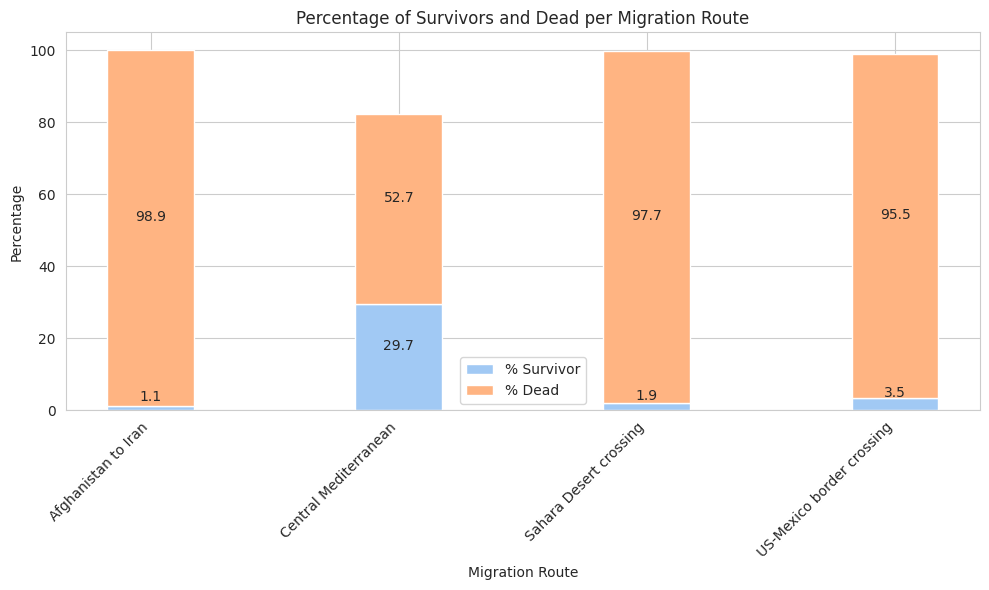

In [398]:
fig16, ax = plt.subplots(figsize=(10, 6))
width = 0.35
rects1 = ax.bar(df_route_filtered['Migration route'],
                df_route_filtered['%survivor'],
                width,
                label='% Survivor')
rects2 = ax.bar(df_route_filtered['Migration route'],
                df_route_filtered['%dead'],
                width,
                bottom=df_route_filtered['%survivor'],
                label='% Dead')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
ax.set_xlabel('Migration Route')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Survivors and Dead per Migration Route')
ax.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [399]:
fig16.savefig("Safest vs deadliest Migration Route")